In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from matplotlib.colors import LogNorm

sns.set_theme()

# jupyter notebook full-width display
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# no text wrapping
display(HTML("<style>.dataframe td { white-space: nowrap; }</style>"))

# pandas formatting
pd.set_option('display.float_format', '{:.3f}'.format)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

In [2]:
rootdir = 'C:\\Users\\CARRK\\Documents\\Repositories\\dm_app_root\\dm_apps\\herring\\temp\\'
rFD = pd.read_csv(rootdir + 'rejected_fishdetail_data.csv', encoding='unicode_escape', index_col=0)
rLF = pd.read_csv(rootdir + 'rejected_length_frequency_data.csv', encoding='unicode_escape', index_col=0)
rSD = pd.read_csv(rootdir + 'rejected_sample_data.csv', encoding='unicode_escape', index_col=0)

rSD['sample_date'] = pd.to_datetime(rSD['sample_date'], errors='coerce')
rFD['DATETIME'] = pd.to_datetime(rFD['DATETIME'], errors='coerce')

# Descriptive Stats

### FISH DETAILS

In [3]:
rFD.dtypes

sample_id                          int64
DATETIME                  datetime64[ns]
SITE                             float64
PERIOD                            object
CONDITION                         object
fish_number                        int64
FL_WET                           float64
FL_FROZEN                        float64
fish_length                      float64
fish_weight                      float64
SPECIES                           object
SEX                               object
maturity_id                      float64
gonad_weight                     float64
AGER_1                            object
AGE_1                            float64
FSP_1                            float64
COMMENTS_1                        object
AGER_2                            object
AGE_2                            float64
FSP_2                            float64
COMMENTS_2                        object
AGER_3                            object
AGE_3                            float64
FSP_3           

In [4]:
rFD.describe(include='all', datetime_is_numeric=False).T

C:\Users\CARRK\AppData\Local\Temp\1\ipykernel_7528\668877508.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  rFD.describe(include='all', datetime_is_numeric=False).T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
sample_id,7910.000,NaN,NaN,NaN,NaT,NaT,2133210069.351,337174526.444,1984042412.000,1994050869.250,1996060535.000,2021052562.000,3014053047.000
DATETIME,7910,192,1996-06-05 00:00:00,120,1984-04-24,2021-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SITE,7792.000,NaN,NaN,NaN,NaT,NaT,34.094,22.926,1.000,15.000,33.000,46.000,95.000
PERIOD,7369,2,AM,3877,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CONDITION,7819,2,Frozen,4911,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fish_number,7910.000,NaN,NaN,NaN,NaT,NaT,17.675,11.101,1.000,9.000,17.000,25.000,73.000
FL_WET,2986.000,NaN,NaN,NaN,NaT,NaT,248.905,21.515,150.000,233.000,248.000,263.000,358.000
FL_FROZEN,4831.000,NaN,NaN,NaN,NaT,NaT,250.898,19.543,118.000,238.000,250.000,265.000,320.000
fish_length,7817.000,NaN,NaN,NaN,NaT,NaT,255.093,21.017,124.000,241.000,255.000,269.000,358.000
fish_weight,7766.000,NaN,NaN,NaN,NaT,NaT,216.956,61.282,29.000,173.000,210.000,255.000,512.000


In [5]:
for col in rFD.columns:
    print()
    print(col)
    if rFD[col].nunique() > 100:
        print('number of unique values:', rFD[col].nunique())
    else:
        print(rFD[col].unique())


sample_id
number of unique values: 237

DATETIME
number of unique values: 192

SITE
[12. 46. 39. 51. 56. nan 49. 17. 34. 15.  4. 52. 37. 35. 26. 90. 38.  5.
  7. 41. 33. 48. 60.  1. 27.  2.  8. 64. 14. 30. 62. 47. 95. 92. 28. 93.
 94. 25.]

PERIOD
[nan 'PM' 'AM']

CONDITION
['Frozen' 'Fresh' nan]

fish_number
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73]

FL_WET
number of unique values: 112

FL_FROZEN
number of unique values: 114

fish_length
number of unique values: 130

fish_weight
number of unique values: 1741

SPECIES
['A' 'B' 'U' nan]

SEX
['F' 'M' 'U' nan]

maturity_id
[ 2.  3.  4.  6.  1.  5. nan]

gonad_weight
number of unique values: 705

AGER_1
[nan 'JM']

AGE_1
[ 4.  5.  6.  9.  7.  3.  8.  2. nan  0.]

FSP_1
[ 3.  4.  2.  5. nan  0.  7.  9.  6.]

COMMENTS_1
number of unique values: 149

AGER_2
[nan

### SAMPLES

In [6]:
rSD.dtypes

sample_id                          int64
sample_date               datetime64[ns]
district_id                        int64
RIVER                             object
SAMPLER                           object
CODE                             float64
gear_id                            int64
SITE                               int64
NO_NETS                          float64
catch_weight_lbs                 float64
HOURS_FISHED                     float64
ZONE                              object
LAST_NAME                         object
COMMENTS                          object
BYCATCH_SBASS                    float64
BYCATCH_SHAD                     float64
BYCATCH_OTHER                    float64
remarks                           object
total_fish_preserved             float64
total_fish_measured              float64
sample_weight_lbs                float64
DESCRIPTION OF PROBLEM            object
dtype: object

In [7]:
rSD.describe(include='all', datetime_is_numeric=False).T

C:\Users\CARRK\AppData\Local\Temp\1\ipykernel_7528\3763395085.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  rSD.describe(include='all', datetime_is_numeric=False).T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
sample_id,37.000,NaN,NaN,NaN,NaT,NaT,4352644062.324,3567918462.407,2006000011.000,2011000034.000,2019000048.000,4988040037.000,13988040037.000
sample_date,6,3,1988-05-23 00:00:00,2,1988-05-23,2004-06-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
district_id,37.000,NaN,NaN,NaN,NaT,NaT,2.000,0.000,2.000,2.000,2.000,2.000,2.000
RIVER,37,1,SWMARG,37,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SAMPLER,37,14,Donald J Gillis,12,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CODE,0.000,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gear_id,37.000,NaN,NaN,NaN,NaT,NaT,81.000,0.000,81.000,81.000,81.000,81.000,81.000
SITE,37.000,NaN,NaN,NaN,NaT,NaT,35.297,17.659,1.000,28.000,37.000,48.000,65.000
NO_NETS,22.000,NaN,NaN,NaN,NaT,NaT,1.000,0.000,1.000,1.000,1.000,1.000,1.000
catch_weight_lbs,35.000,NaN,NaN,NaN,NaT,NaT,1971.743,6142.146,0.000,0.000,0.000,1326.500,36076.000


In [8]:
for col in rSD.columns:
    print()
    print(col)
    if rSD[col].nunique() > 100:
        print('number of unique values:', rSD[col].nunique())
    else:
        print(rSD[col].unique())


sample_id
[ 2006000011  2006000017  2006000033  2006000048  2006000064  2006000065
  2010000001  2010000048  2010000062  2011000034  2012000023  2013000033
  2014000002  2014000015  2014000017  2016000028  2017000048  2017000051
  2019000048  2988040037  2988052348  2997061258  3004061001  3988040037
  3988052348  3997061258  4004061001  4988040037  5988040037  6988040037
  7988040037  8988040037  9988040037 10988040037 11988040037 12988040037
 13988040037]

sample_date
[                          'NaT' '1988-05-23T00:00:00.000000000'
 '1997-06-12T00:00:00.000000000' '2004-06-10T00:00:00.000000000']

district_id
[2]

RIVER
['SWMARG']

SAMPLER
['Darlene Cameron' 'John A Chisholm' 'Daniel Stewart' 'Michael D Gillis'
 'Kevin MacKinnon' 'James MacFarlane' 'Charles McDaniel'
 'Vincent MacKinnon' 'Joan Ingram' 'John A Coady' 'Richard Gillis'
 'Gerard MacFarlane' 'Bruce MacLellan' 'Donald J Gillis']

CODE
[nan]

gear_id
[81]

SITE
[11 17 33 48 64 65  1 62 34 23  2 15 28 51 37 58]

NO_NETS
[ 1

### LENGTH FREQUENCIES

In [9]:
rLF.dtypes

count                       int64
length_bin_id             float64
sample_id                   int64
DESCRIPTION OF PROBLEM     object
dtype: object

In [10]:
rLF.describe(include='all', datetime_is_numeric=False).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
count,2178.000,NaN,NaN,NaN,17.057,16.410,0.000,3.000,11.000,28.000,110.000
length_bin_id,2178.000,NaN,NaN,NaN,25.377,2.102,20.000,24.000,25.500,27.000,32.000
sample_id,2178.000,NaN,NaN,NaN,2193707888.412,532150322.049,1990051134.000,1994051115.000,1995061071.000,2017053092.000,4018061364.000
DESCRIPTION OF PROBLEM,2178,1,Unmatched length frequency. No matching sample...,2178,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
for col in rLF.columns:
    print()
    print(col)
    if rLF[col].nunique() > 100:
        print('number of unique values:', rLF[col].nunique())
    else:
        print(rLF[col].unique())


count
[  1  11  12  16  37  30  38  36  17   9   5   3   7   6   8  15  42  27
  35  14  10   4   2  54  45  29  28  22 110  72  84  24  25  64  31  49
  19  69  48   0  23  26  18  34  32  33  50  46  20  21  40  13  43  47
  41  55  44  65  57  39  63  66  60  61  51  80  56  59  52  53  62  58
  82  68  70]

length_bin_id
[25.  25.5 26.  26.5 27.  27.5 28.  28.5 29.  29.5 30.  30.5 31.  31.5
 32.  24.5 23.  24.  23.5 21.5 22.  22.5 21.  20.  20.5]

sample_id
number of unique values: 186

DESCRIPTION OF PROBLEM
['Unmatched length frequency. No matching sample found.']


# Data Visualisation

In [12]:
def types_of_data(series):
    
    numbers, strings, blanks, n_null = 0, 0, 0, 0
    
    for item in series:
        if pd.isnull(item):
            n_null += 1
        else:
            try:
                float(item)
                numbers += 1
            except (ValueError):
                strings += 1
                if str(item) == ' ' or str(item) == '':
                    blanks += 1
                
    # note: blanks are strings
    return numbers, strings, blanks, n_null


def print_data_info(dataframe, column):
    
    print('\n--------------------------------------------------\nData Info:', column.upper(), '\n')
    
    numbers, strings, blanks, n_null = types_of_data(dataframe[column])
    
    print('UNIQUE numbers, strings, blanks, null =', types_of_data(dataframe[column].unique()))
    print('number of numeric =', numbers)
    print('number of strings =', strings)
    print('number of blanks =', blanks)  # blanks are strings
    print('number of null = ', n_null)
    print('check: ', numbers + strings + n_null, '==', dataframe[column].shape[0])

    
def print_hist(dataframe, column, max_bins=100, colours=(0,2)):
    
    print('\n--------------------------------------------------\nHistogram:', column.upper())
    
    plt.figure(figsize=(14, 4))
    
    n_unique = dataframe[column].nunique()
    if n_unique <= max_bins:
        bins = n_unique
    else:
        bins = max_bins
    
    # if there are too many bins, rotate the text to make it readable
    if bins > 20:
        xrot = 90
    else:
        xrot = 0
        
    is_categorical = dataframe[column].dtype == 'object'
    if is_categorical:
        plot = dataframe[column].astype(str).sort_values().hist(
            bins=bins, xrot=90, color=sns.color_palette()[colours[1]]
        )
    else:
        plot = dataframe[column].hist(
            bins=bins, xrot=0, color=sns.color_palette()[colours[0]]
        )
    
    plot.yaxis.tick_right()  # so all of the graphs align with eachother, regarless of text length
    plt.show()
    
    
def print_timeseries(dataframe, column, time_column, colours=(1,3)):
    
    print('\n------------------------------------------------\nTime Series:', column.upper(), sep='')
    
    plt.figure(figsize=(14, 4))
    
    # could make the categorical check an input variable, but this just works (albiet super clean)
    try:
        plot = sns.lineplot(
            x = dataframe[time_column].dt.year, 
            y = dataframe[column].astype(float),  # cast int to float or get ValueErrors with IQR (pi 50)
            errorbar = ('pi', 50),  # IQR
            color = sns.color_palette()[colours[0]]
        )
        print('NUMERICAL')  # NOTE: some are actually categorical but stored as an int(eg, site), those averages don't have meaning
    except (ValueError, TypeError):  # categorical variables, can't cast to float
        plot = sns.lineplot(
            x = dataframe[time_column].dt.year, 
            y = dataframe[column].astype(str).sort_values(),
            errorbar = ('pi', 50), 
            color = sns.color_palette()[colours[1]]
        )
        print('CATEGORICAL')  # NOTE: categorical variables treated as ordinal to make plotting possible, averages don't have meaning
       
    
    # show entire dataset time period for all plots
    plot.set_xlim(1982, 2022)
    plot.yaxis.tick_right()  # so all of the graphs align with eachother, regarless of text length
    
    plt.show()
    
    
def do_EDA_stuff(dataframe, column, date_column='DATETIME'):
    """default of datetime column name 'DATETIME' often used, can be overwritten"""
    
    print_data_info(dataframe, column)
    print_hist(dataframe, column)
    print_timeseries(dataframe, column, date_column)
    
    

### FISH DETAILS

In [13]:
rFD.columns

Index(['sample_id', 'DATETIME', 'SITE', 'PERIOD', 'CONDITION', 'fish_number',
       'FL_WET', 'FL_FROZEN', 'fish_length', 'fish_weight', 'SPECIES', 'SEX',
       'maturity_id', 'gonad_weight', 'AGER_1', 'AGE_1', 'FSP_1', 'COMMENTS_1',
       'AGER_2', 'AGE_2', 'FSP_2', 'COMMENTS_2', 'AGER_3', 'AGE_3', 'FSP_3',
       'COMMENTS_3', 'ENVELOP_COMMENTS', 'remarks', 'DESCRIPTION OF PROBLEM'],
      dtype='object')


--------------------------------------------------
Data Info: SITE 

UNIQUE numbers, strings, blanks, null = (37, 0, 0, 1)
number of numeric = 7792
number of strings = 0
number of blanks = 0
number of null =  118
check:  7910 == 7910

--------------------------------------------------
Histogram: SITE


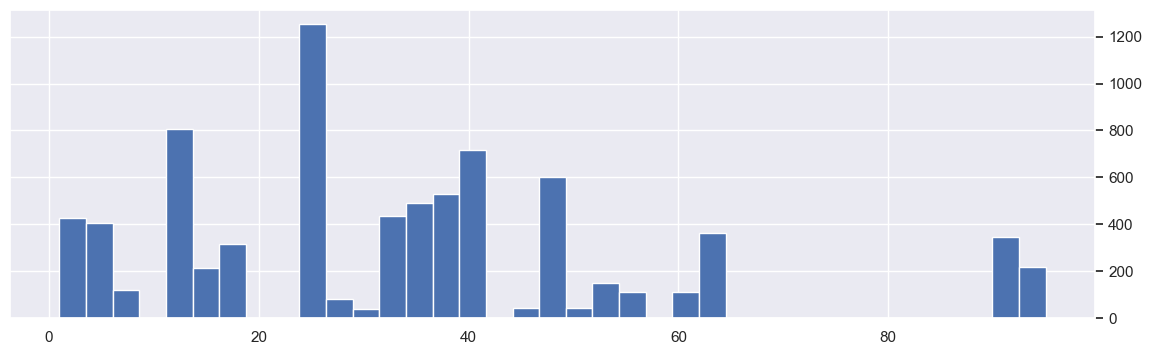


------------------------------------------------
Time Series:SITE
NUMERICAL


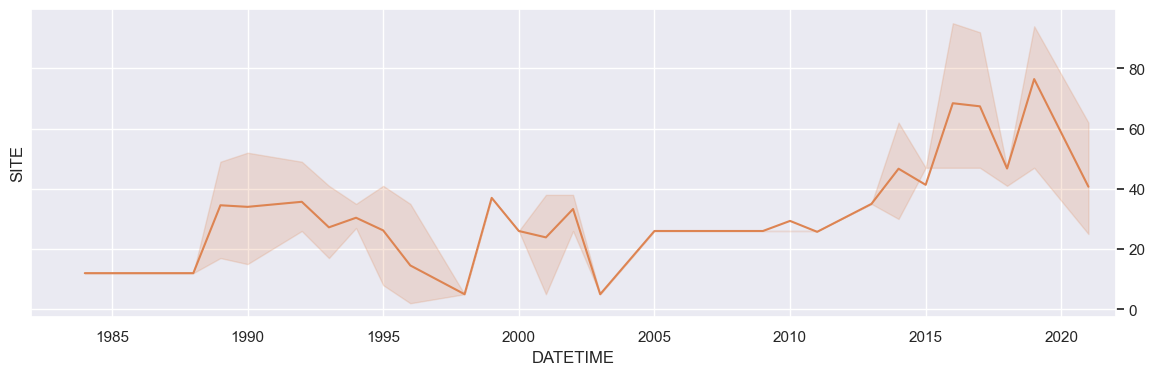


--------------------------------------------------
Data Info: PERIOD 

UNIQUE numbers, strings, blanks, null = (0, 2, 0, 1)
number of numeric = 0
number of strings = 7369
number of blanks = 0
number of null =  541
check:  7910 == 7910

--------------------------------------------------
Histogram: PERIOD


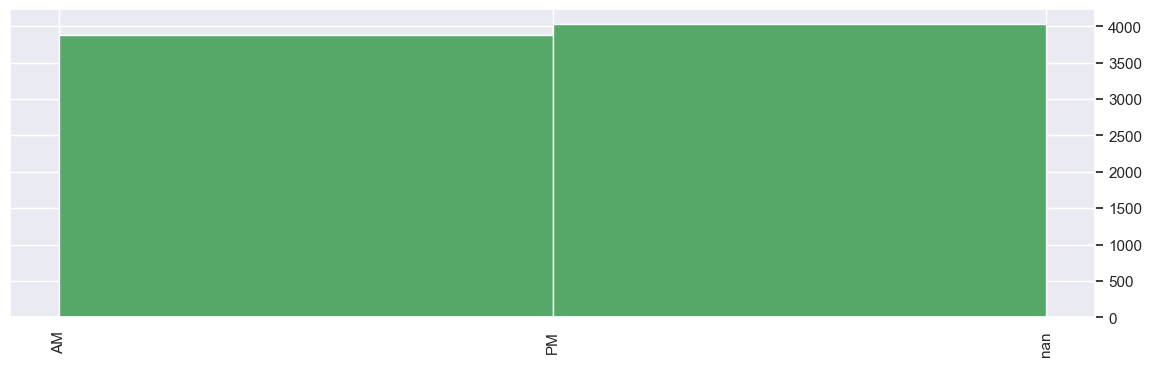


------------------------------------------------
Time Series:PERIOD
CATEGORICAL


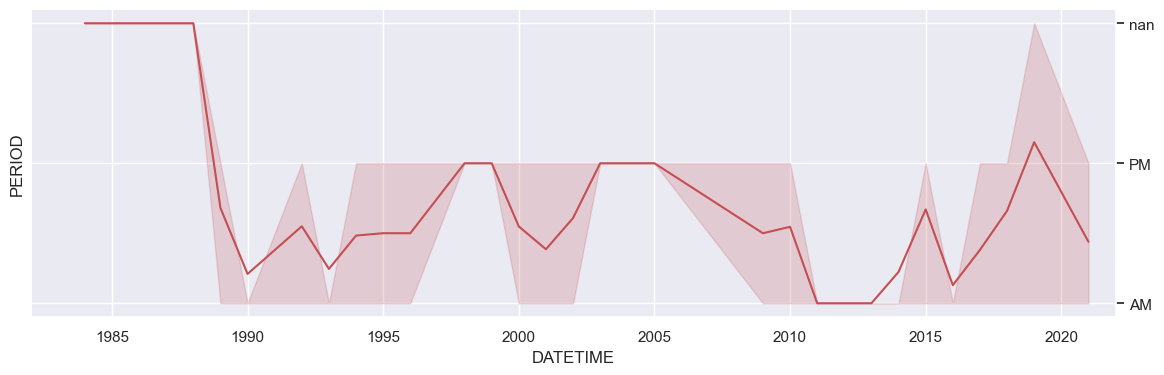


--------------------------------------------------
Data Info: CONDITION 

UNIQUE numbers, strings, blanks, null = (0, 2, 0, 1)
number of numeric = 0
number of strings = 7819
number of blanks = 0
number of null =  91
check:  7910 == 7910

--------------------------------------------------
Histogram: CONDITION


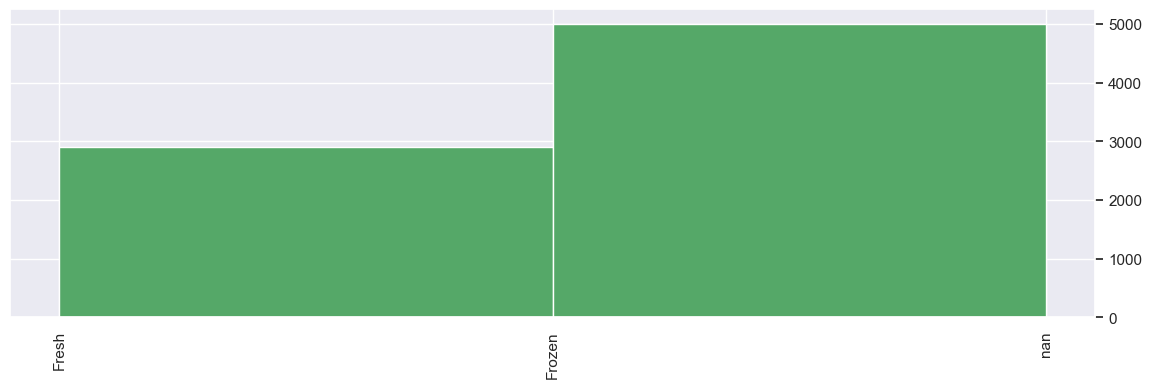


------------------------------------------------
Time Series:CONDITION
CATEGORICAL


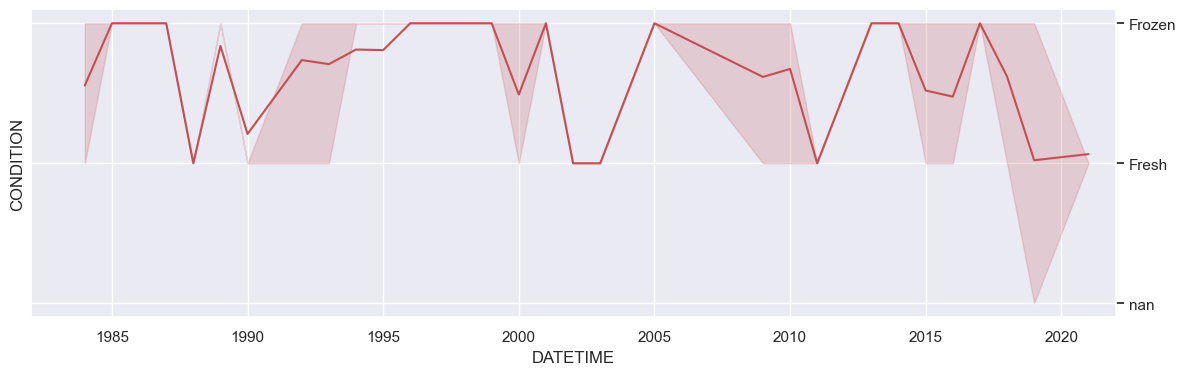


--------------------------------------------------
Data Info: FISH_NUMBER 

UNIQUE numbers, strings, blanks, null = (73, 0, 0, 0)
number of numeric = 7910
number of strings = 0
number of blanks = 0
number of null =  0
check:  7910 == 7910

--------------------------------------------------
Histogram: FISH_NUMBER


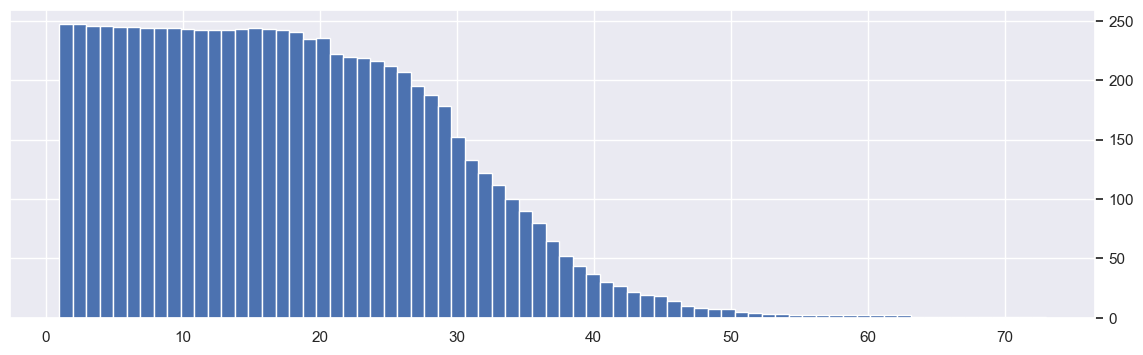


------------------------------------------------
Time Series:FISH_NUMBER
NUMERICAL


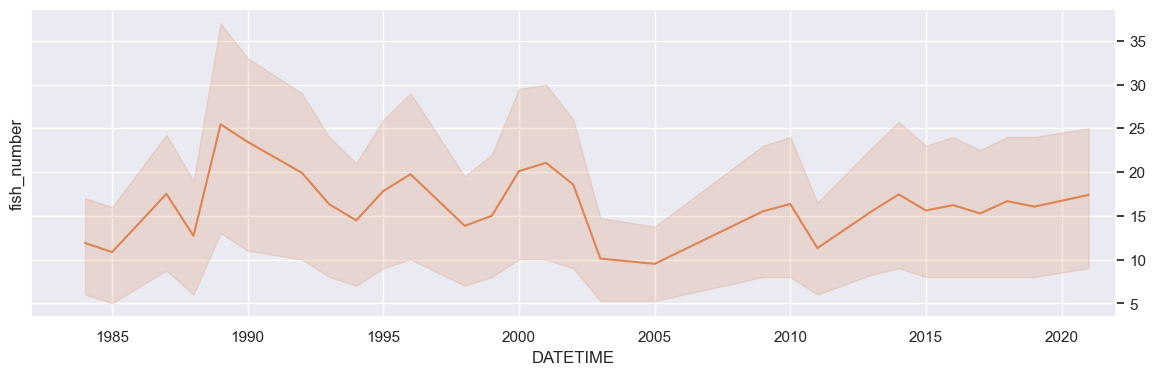


--------------------------------------------------
Data Info: FL_WET 

UNIQUE numbers, strings, blanks, null = (112, 0, 0, 1)
number of numeric = 2986
number of strings = 0
number of blanks = 0
number of null =  4924
check:  7910 == 7910

--------------------------------------------------
Histogram: FL_WET


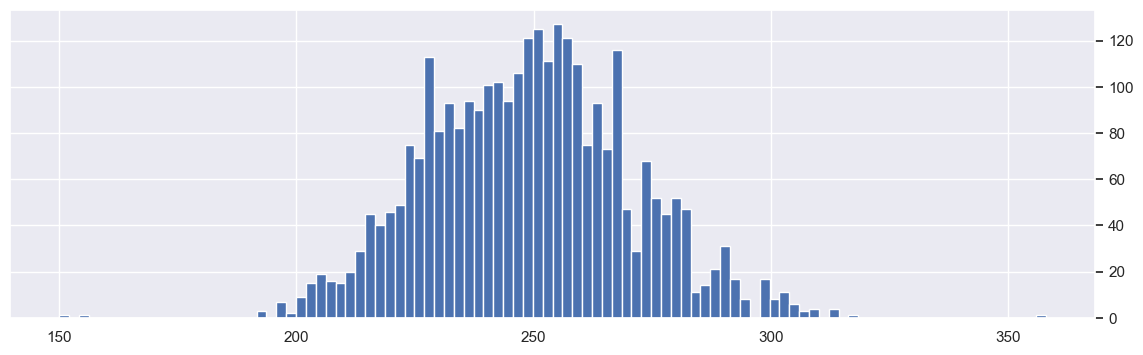


------------------------------------------------
Time Series:FL_WET
NUMERICAL


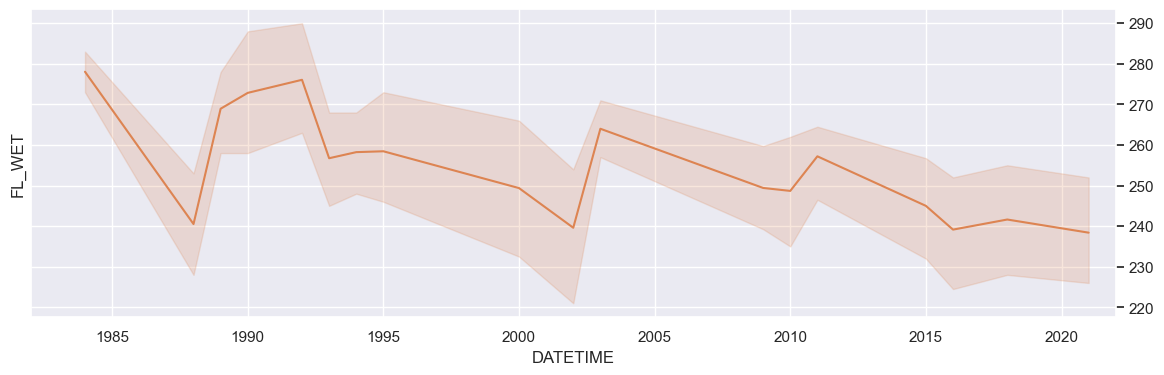


--------------------------------------------------
Data Info: FL_FROZEN 

UNIQUE numbers, strings, blanks, null = (114, 0, 0, 1)
number of numeric = 4831
number of strings = 0
number of blanks = 0
number of null =  3079
check:  7910 == 7910

--------------------------------------------------
Histogram: FL_FROZEN


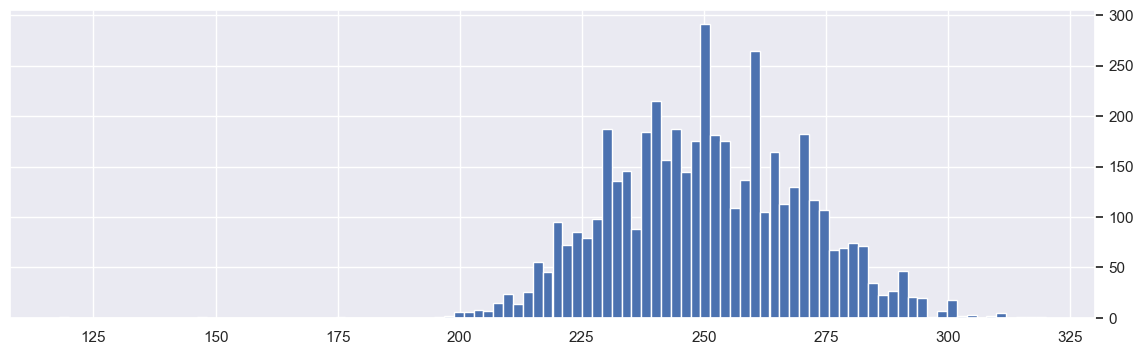


------------------------------------------------
Time Series:FL_FROZEN
NUMERICAL


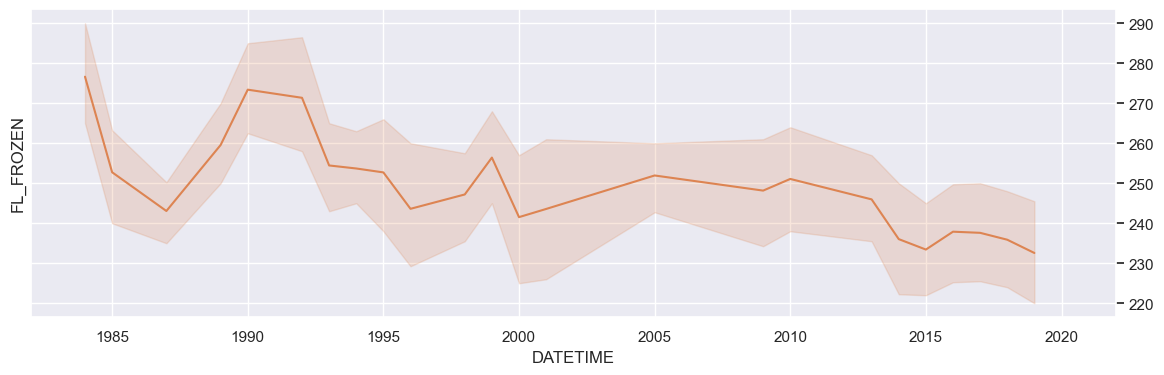


--------------------------------------------------
Data Info: FISH_LENGTH 

UNIQUE numbers, strings, blanks, null = (130, 0, 0, 1)
number of numeric = 7817
number of strings = 0
number of blanks = 0
number of null =  93
check:  7910 == 7910

--------------------------------------------------
Histogram: FISH_LENGTH


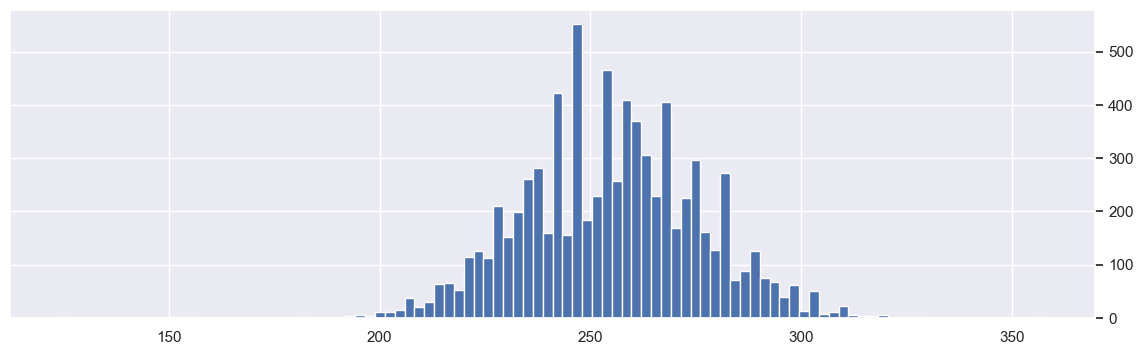


------------------------------------------------
Time Series:FISH_LENGTH
NUMERICAL


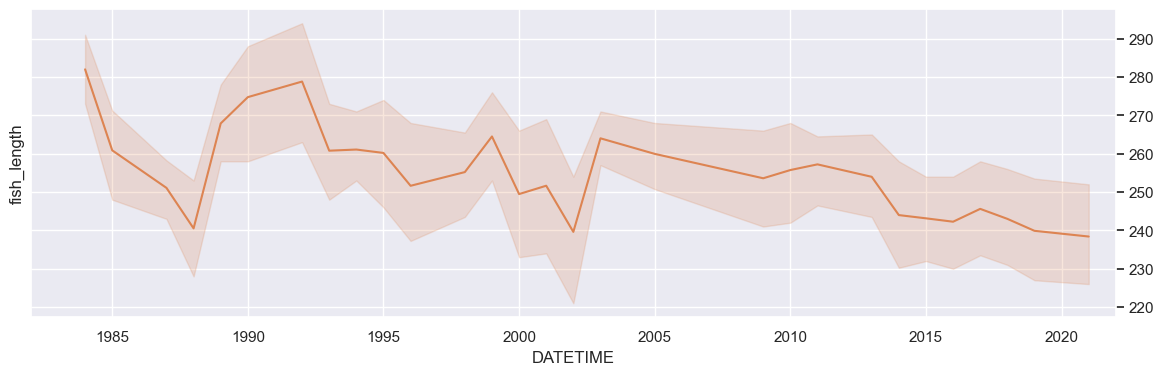


--------------------------------------------------
Data Info: FISH_WEIGHT 

UNIQUE numbers, strings, blanks, null = (1741, 0, 0, 1)
number of numeric = 7766
number of strings = 0
number of blanks = 0
number of null =  144
check:  7910 == 7910

--------------------------------------------------
Histogram: FISH_WEIGHT


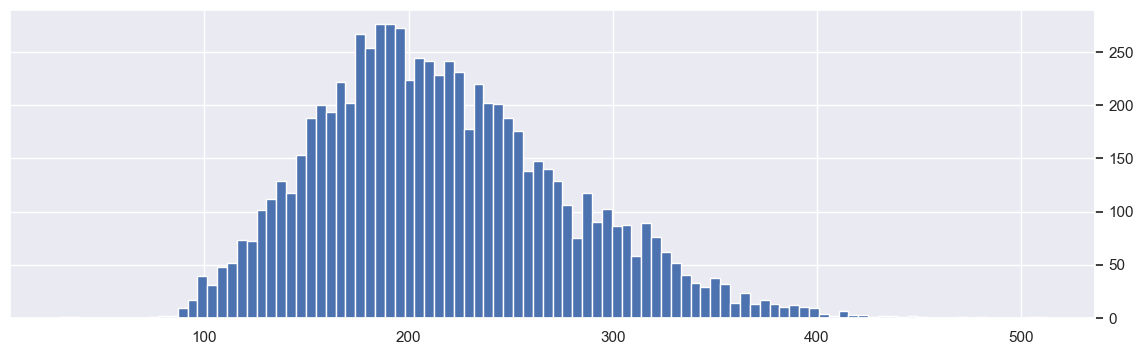


------------------------------------------------
Time Series:FISH_WEIGHT
NUMERICAL


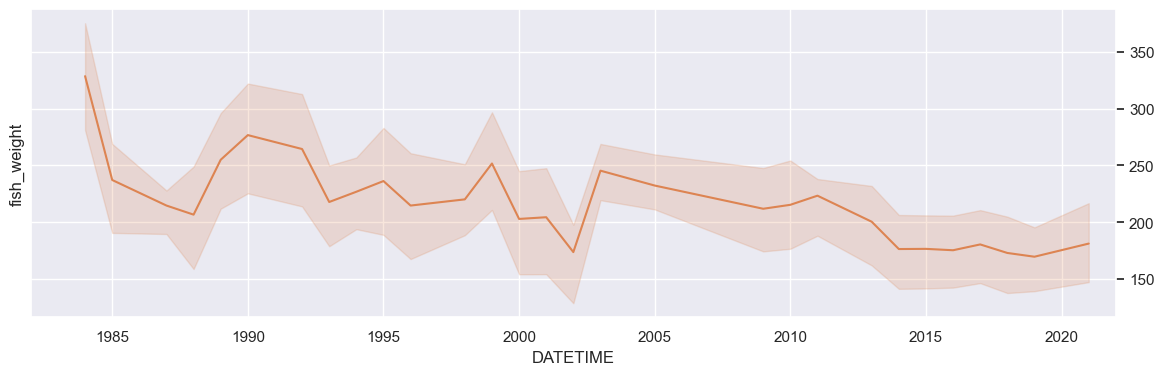


--------------------------------------------------
Data Info: SPECIES 

UNIQUE numbers, strings, blanks, null = (0, 3, 0, 1)
number of numeric = 0
number of strings = 7787
number of blanks = 0
number of null =  123
check:  7910 == 7910

--------------------------------------------------
Histogram: SPECIES


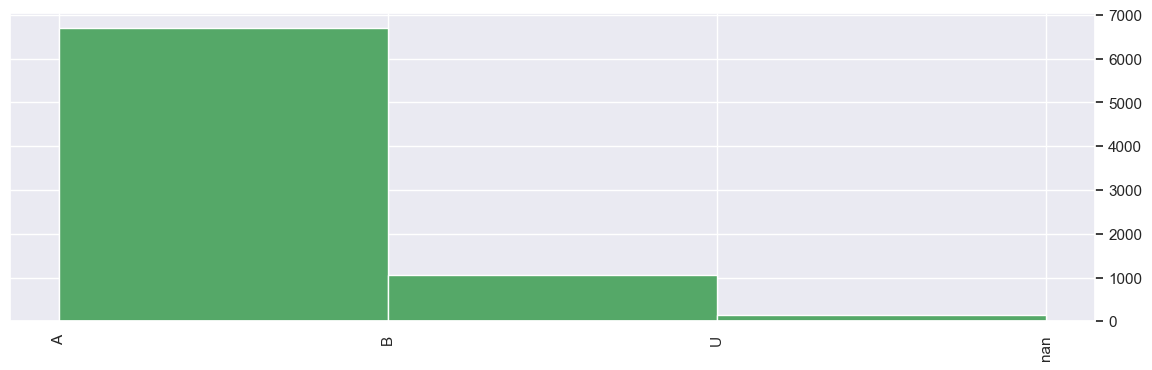


------------------------------------------------
Time Series:SPECIES
CATEGORICAL


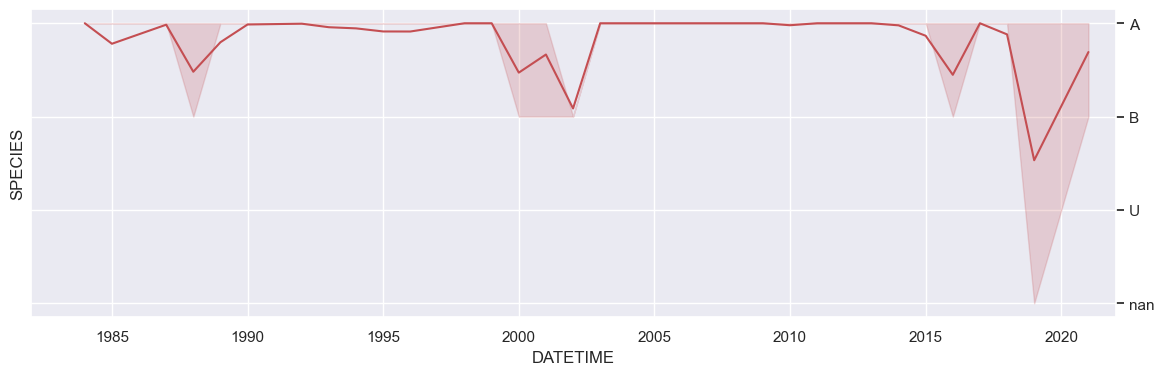


--------------------------------------------------
Data Info: SEX 

UNIQUE numbers, strings, blanks, null = (0, 3, 0, 1)
number of numeric = 0
number of strings = 7787
number of blanks = 0
number of null =  123
check:  7910 == 7910

--------------------------------------------------
Histogram: SEX


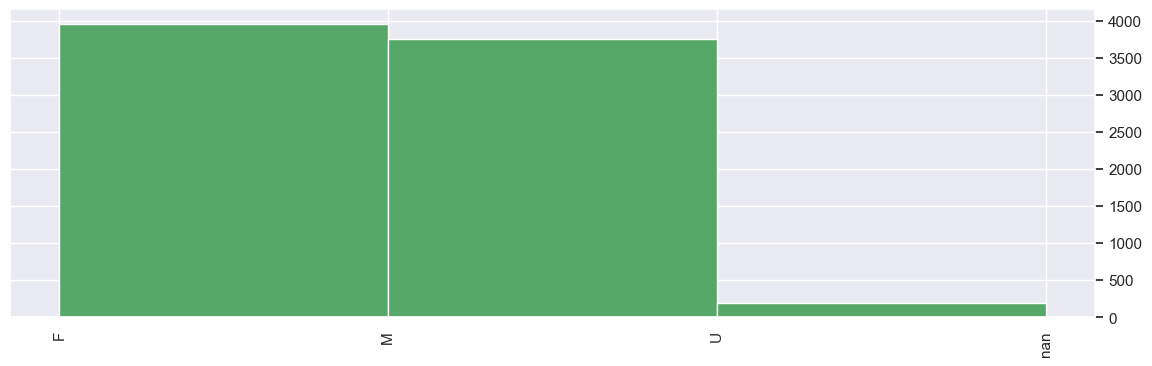


------------------------------------------------
Time Series:SEX
CATEGORICAL


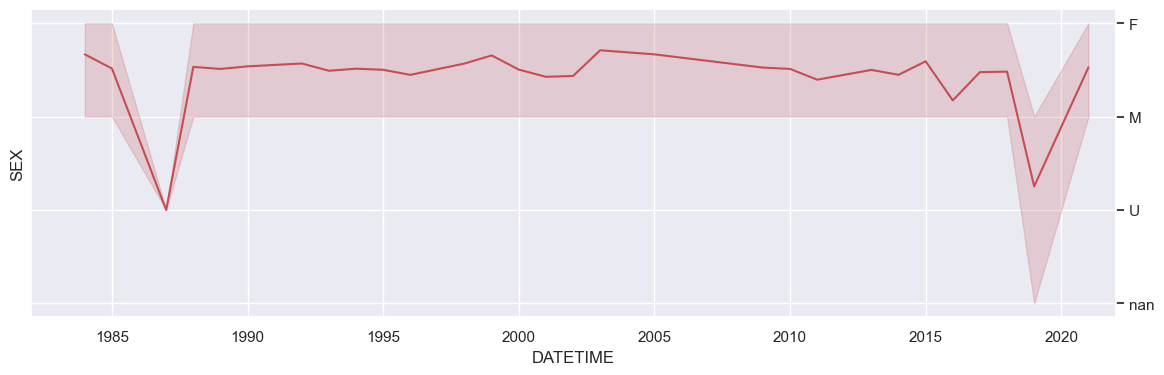


--------------------------------------------------
Data Info: MATURITY_ID 

UNIQUE numbers, strings, blanks, null = (6, 0, 0, 1)
number of numeric = 7727
number of strings = 0
number of blanks = 0
number of null =  183
check:  7910 == 7910

--------------------------------------------------
Histogram: MATURITY_ID


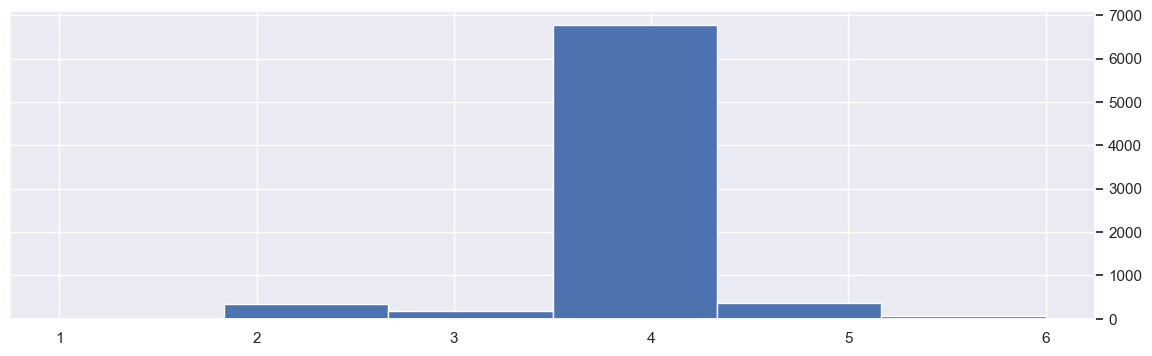


------------------------------------------------
Time Series:MATURITY_ID
NUMERICAL


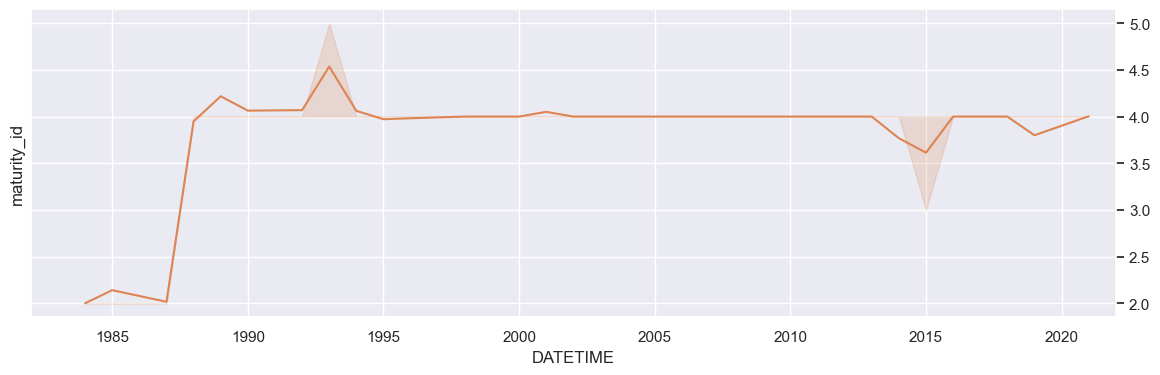


--------------------------------------------------
Data Info: GONAD_WEIGHT 

UNIQUE numbers, strings, blanks, null = (705, 0, 0, 1)
number of numeric = 3979
number of strings = 0
number of blanks = 0
number of null =  3931
check:  7910 == 7910

--------------------------------------------------
Histogram: GONAD_WEIGHT


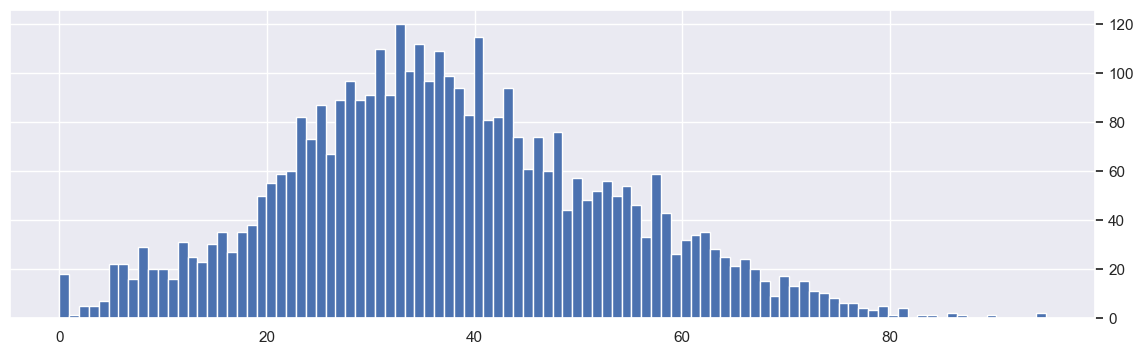


------------------------------------------------
Time Series:GONAD_WEIGHT
NUMERICAL


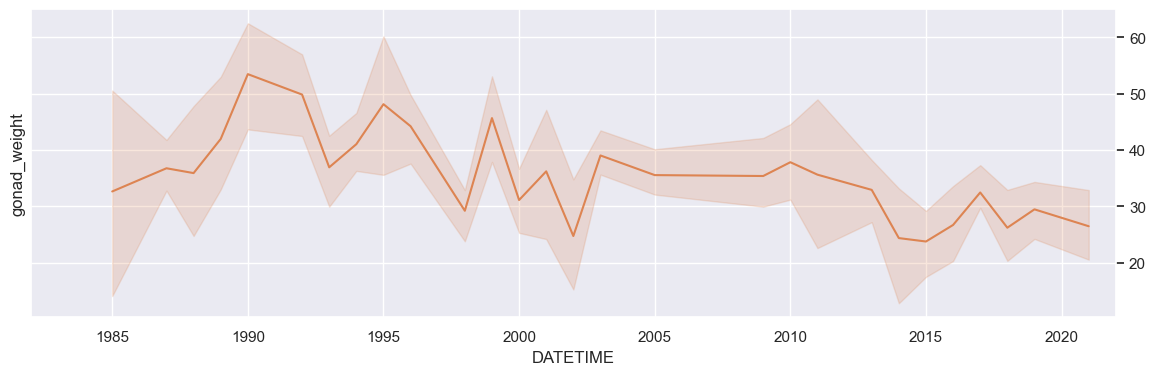


--------------------------------------------------
Data Info: AGER_1 

UNIQUE numbers, strings, blanks, null = (0, 1, 0, 1)
number of numeric = 0
number of strings = 1190
number of blanks = 0
number of null =  6720
check:  7910 == 7910

--------------------------------------------------
Histogram: AGER_1


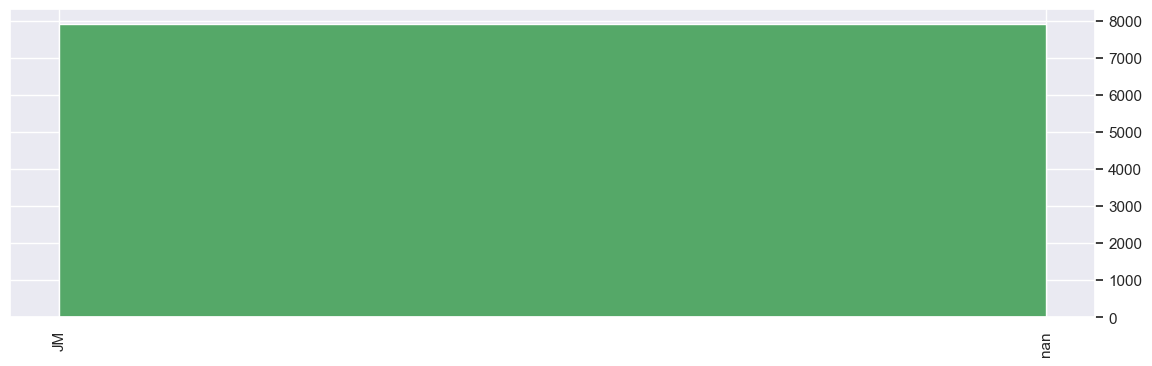


------------------------------------------------
Time Series:AGER_1
CATEGORICAL


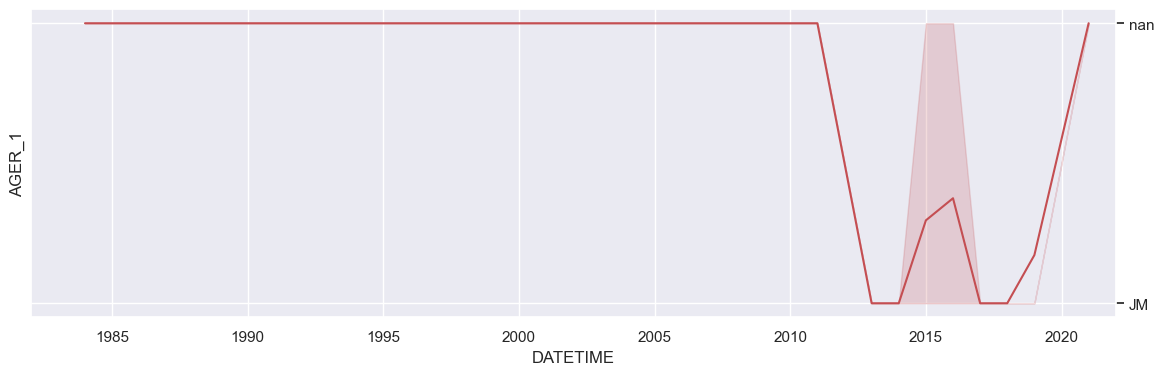


--------------------------------------------------
Data Info: AGE_1 

UNIQUE numbers, strings, blanks, null = (9, 0, 0, 1)
number of numeric = 5134
number of strings = 0
number of blanks = 0
number of null =  2776
check:  7910 == 7910

--------------------------------------------------
Histogram: AGE_1


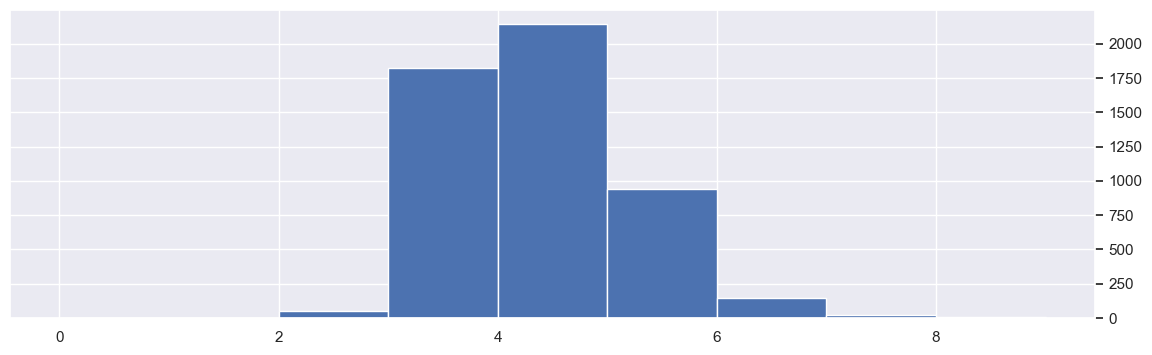


------------------------------------------------
Time Series:AGE_1
NUMERICAL


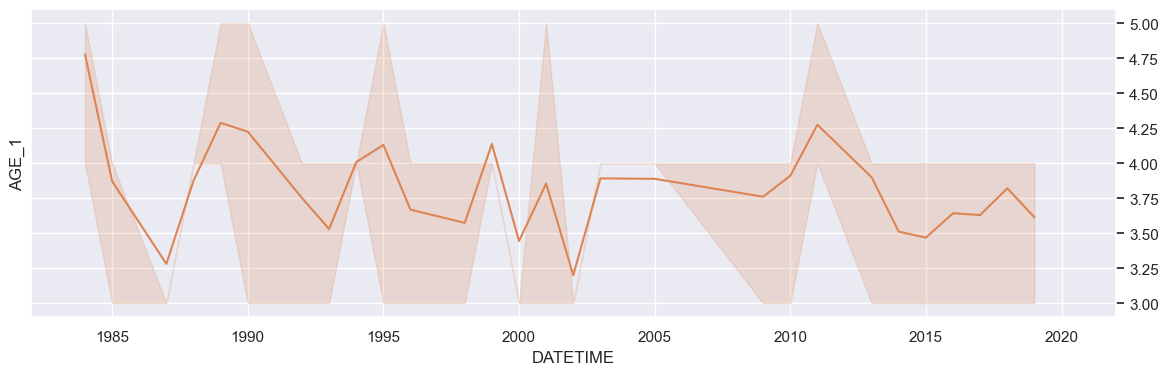


--------------------------------------------------
Data Info: FSP_1 

UNIQUE numbers, strings, blanks, null = (8, 0, 0, 1)
number of numeric = 5017
number of strings = 0
number of blanks = 0
number of null =  2893
check:  7910 == 7910

--------------------------------------------------
Histogram: FSP_1


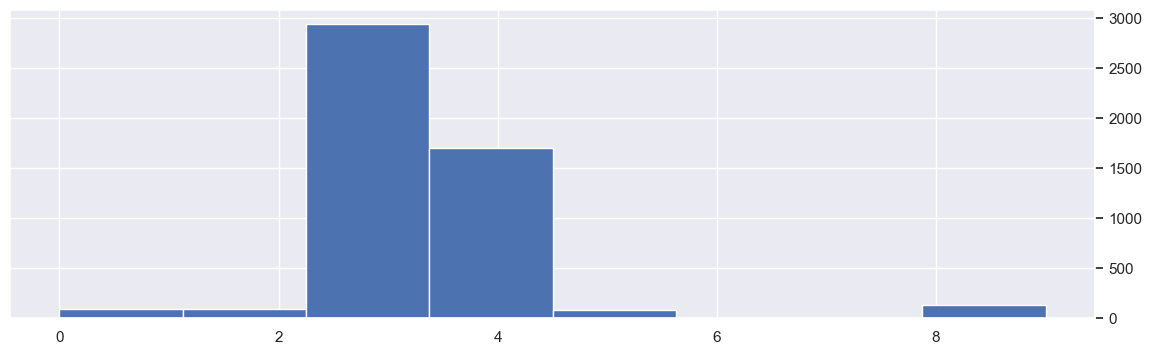


------------------------------------------------
Time Series:FSP_1
NUMERICAL


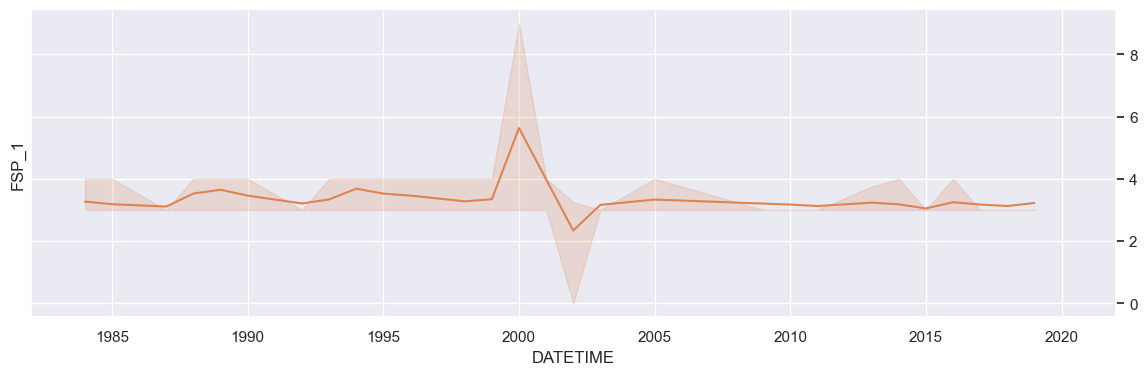


--------------------------------------------------
Data Info: AGER_2 

UNIQUE numbers, strings, blanks, null = (0, 1, 0, 1)
number of numeric = 0
number of strings = 1287
number of blanks = 0
number of null =  6623
check:  7910 == 7910

--------------------------------------------------
Histogram: AGER_2


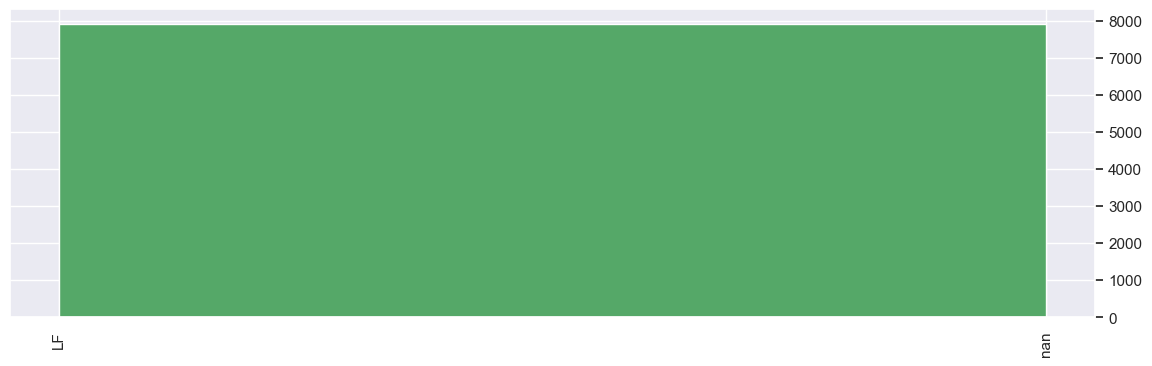


------------------------------------------------
Time Series:AGER_2
CATEGORICAL


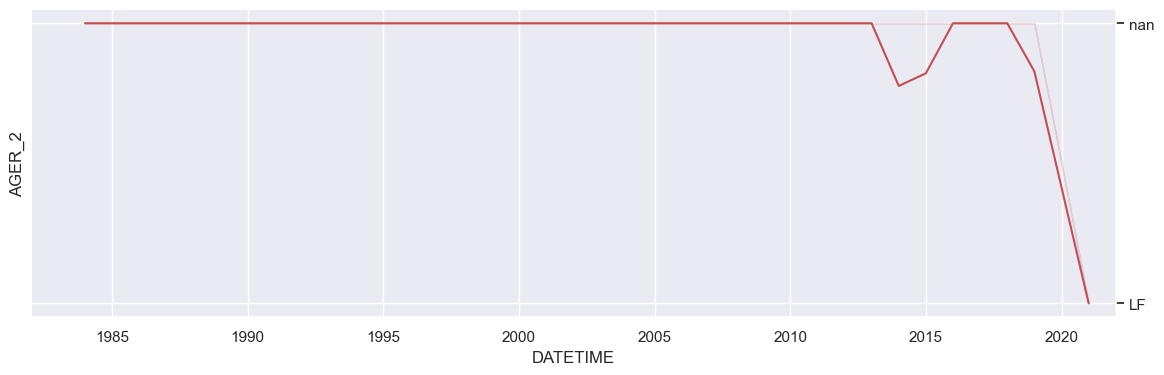


--------------------------------------------------
Data Info: AGE_2 

UNIQUE numbers, strings, blanks, null = (7, 0, 0, 1)
number of numeric = 1245
number of strings = 0
number of blanks = 0
number of null =  6665
check:  7910 == 7910

--------------------------------------------------
Histogram: AGE_2


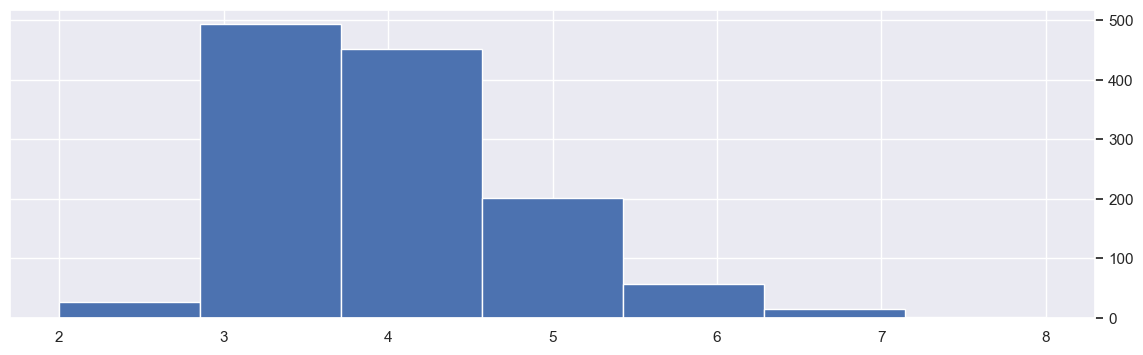


------------------------------------------------
Time Series:AGE_2
NUMERICAL


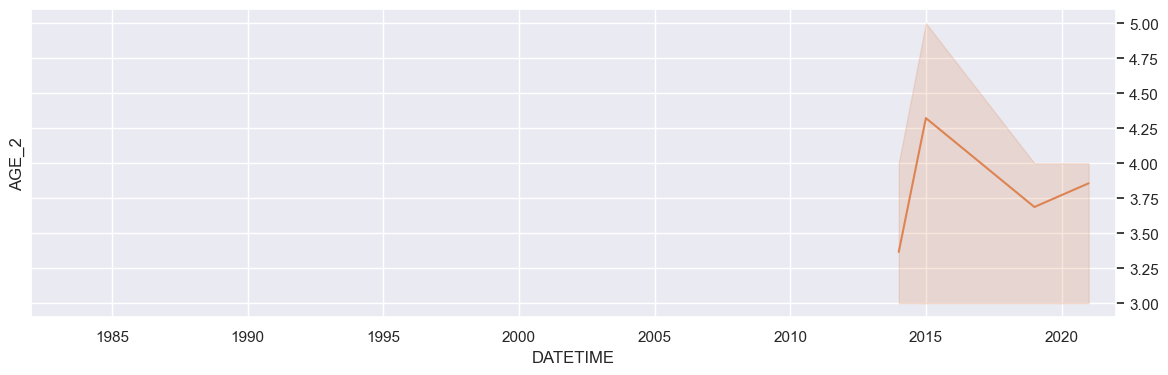


--------------------------------------------------
Data Info: FSP_2 

UNIQUE numbers, strings, blanks, null = (4, 0, 0, 1)
number of numeric = 1245
number of strings = 0
number of blanks = 0
number of null =  6665
check:  7910 == 7910

--------------------------------------------------
Histogram: FSP_2


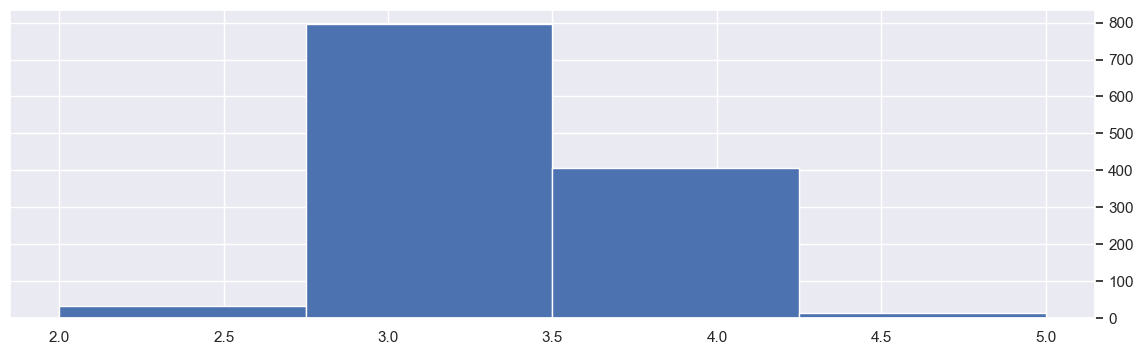


------------------------------------------------
Time Series:FSP_2
NUMERICAL


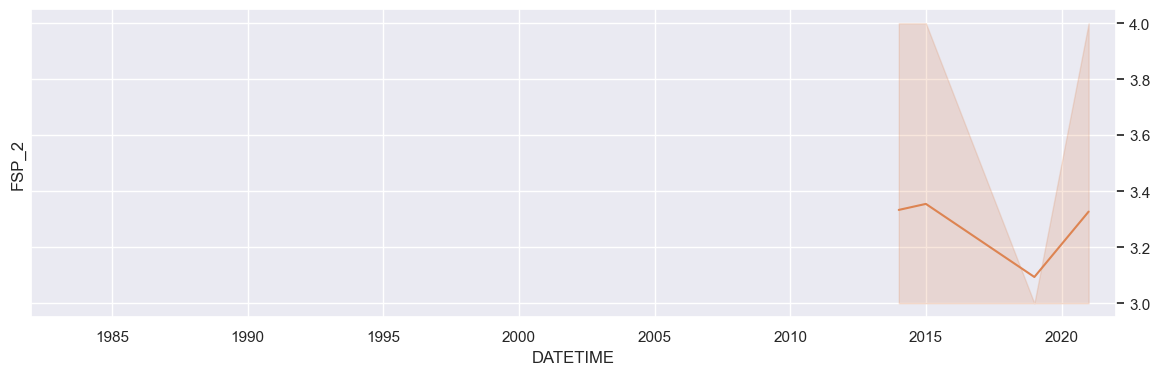


--------------------------------------------------
Data Info: AGER_3 

UNIQUE numbers, strings, blanks, null = (0, 1, 0, 1)
number of numeric = 0
number of strings = 444
number of blanks = 0
number of null =  7466
check:  7910 == 7910

--------------------------------------------------
Histogram: AGER_3


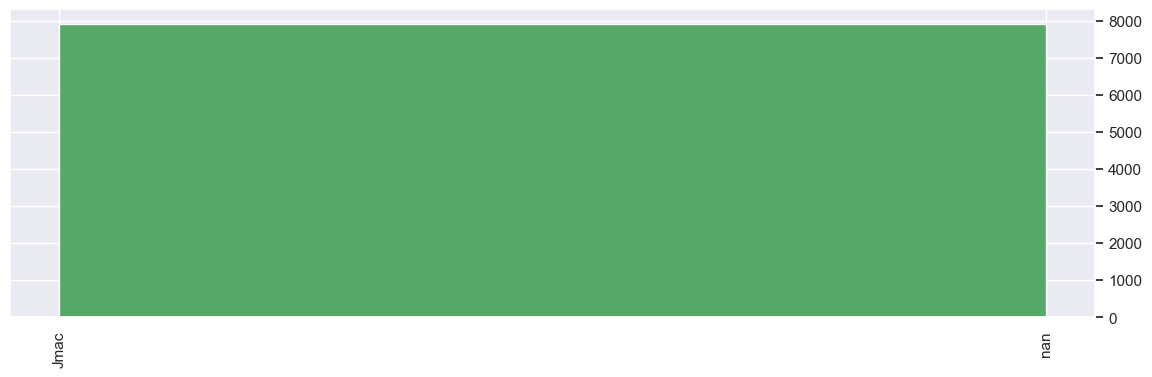


------------------------------------------------
Time Series:AGER_3
CATEGORICAL


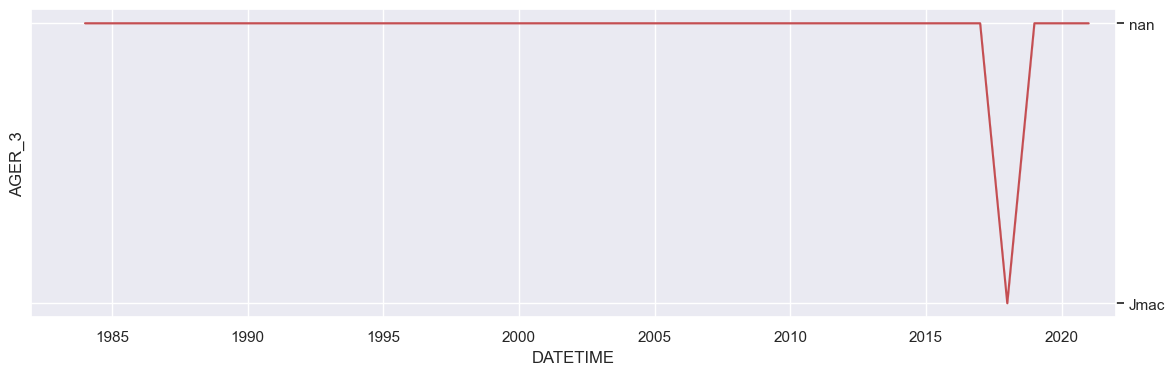


--------------------------------------------------
Data Info: AGE_3 

UNIQUE numbers, strings, blanks, null = (6, 0, 0, 1)
number of numeric = 430
number of strings = 0
number of blanks = 0
number of null =  7480
check:  7910 == 7910

--------------------------------------------------
Histogram: AGE_3


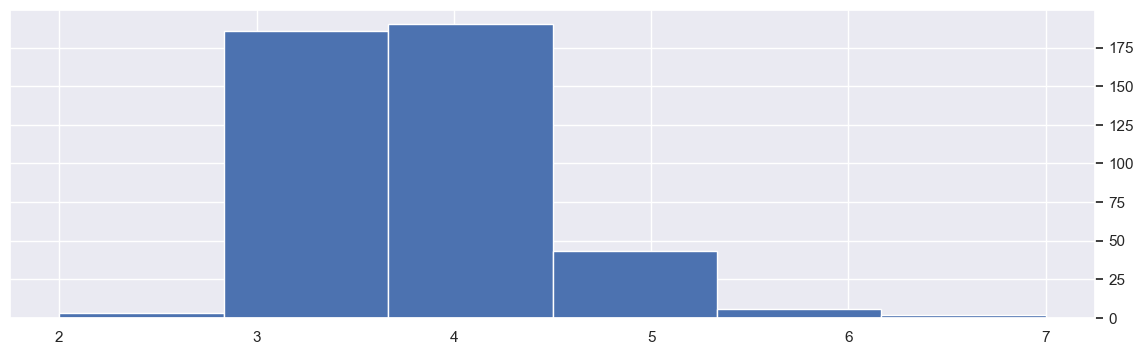


------------------------------------------------
Time Series:AGE_3
NUMERICAL


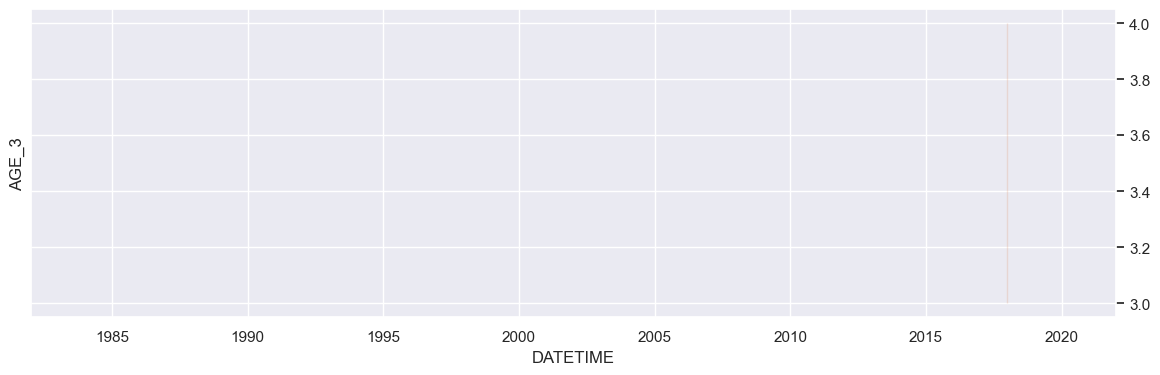


--------------------------------------------------
Data Info: FSP_3 

UNIQUE numbers, strings, blanks, null = (3, 0, 0, 1)
number of numeric = 430
number of strings = 0
number of blanks = 0
number of null =  7480
check:  7910 == 7910

--------------------------------------------------
Histogram: FSP_3


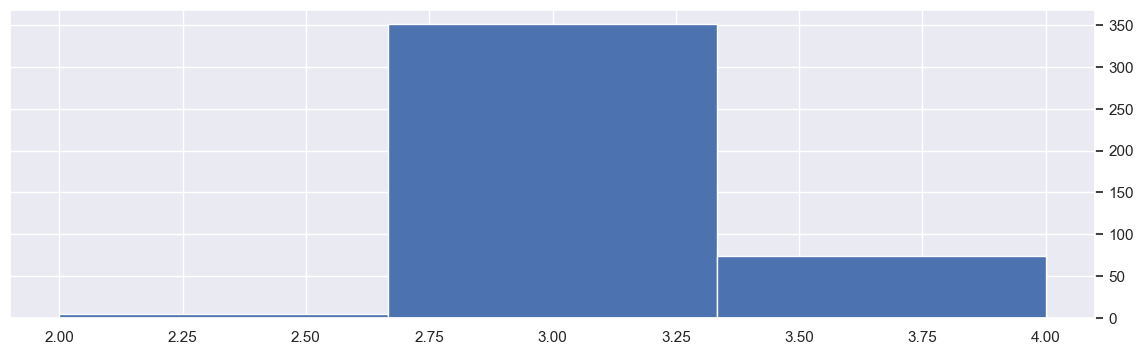


------------------------------------------------
Time Series:FSP_3
NUMERICAL


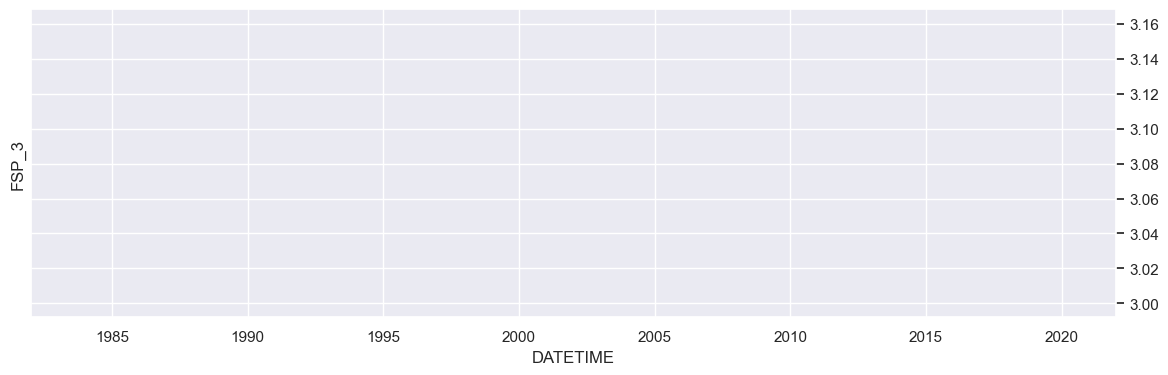


--------------------------------------------------
Data Info: DESCRIPTION OF PROBLEM 

UNIQUE numbers, strings, blanks, null = (0, 2, 0, 0)
number of numeric = 0
number of strings = 7910
number of blanks = 0
number of null =  0
check:  7910 == 7910

--------------------------------------------------
Histogram: DESCRIPTION OF PROBLEM


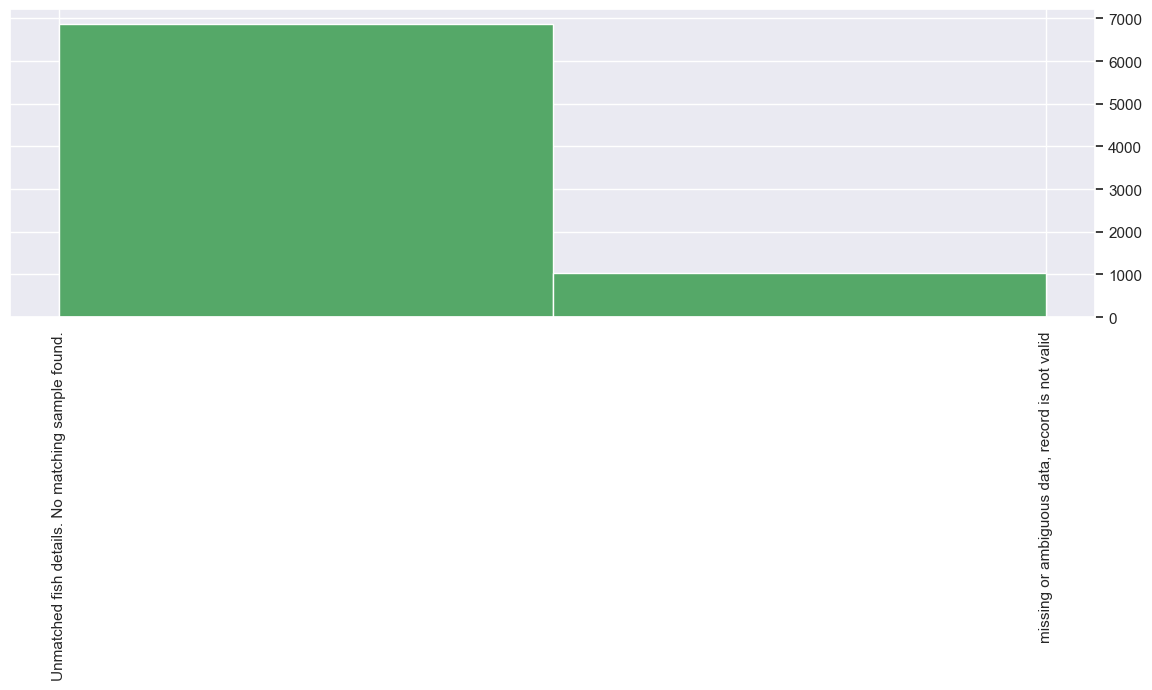


------------------------------------------------
Time Series:DESCRIPTION OF PROBLEM
CATEGORICAL


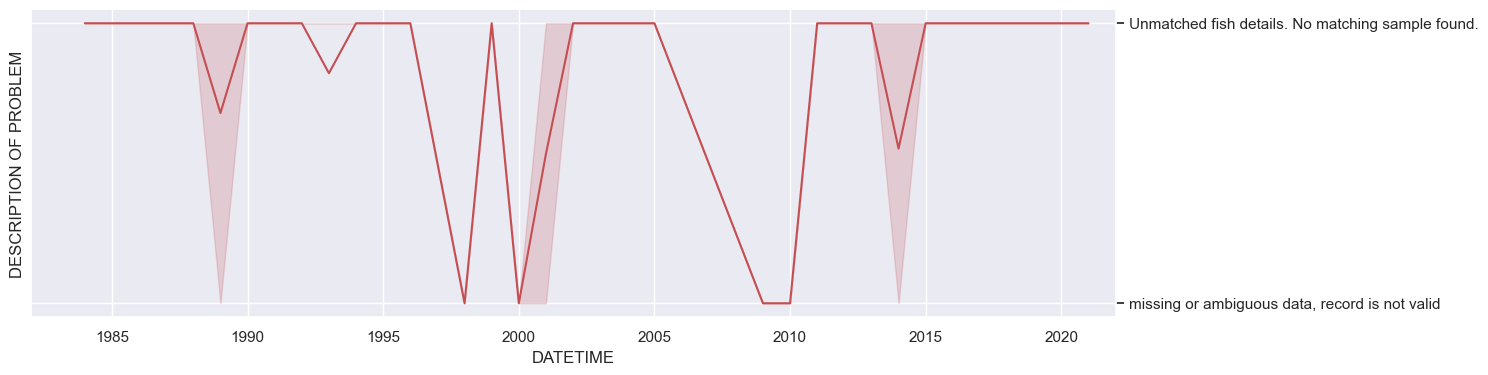

In [14]:
dont_plot_these_columns = [
    'sample_id', 'DATETIME', 
    'COMMENTS_1', 'COMMENTS_2', 'COMMENTS_3', 'ENVELOP_COMMENTS', 'remarks'
]

for col in [x for x in list(rFD.columns) if x not in dont_plot_these_columns]:
    do_EDA_stuff(rFD, col)

### SAMPLES

In [15]:
rSD.columns

Index(['sample_id', 'sample_date', 'district_id', 'RIVER', 'SAMPLER', 'CODE',
       'gear_id', 'SITE', 'NO_NETS', 'catch_weight_lbs', 'HOURS_FISHED',
       'ZONE', 'LAST_NAME', 'COMMENTS', 'BYCATCH_SBASS', 'BYCATCH_SHAD',
       'BYCATCH_OTHER', 'remarks', 'total_fish_preserved',
       'total_fish_measured', 'sample_weight_lbs', 'DESCRIPTION OF PROBLEM'],
      dtype='object')

district_id

--------------------------------------------------
Data Info: DISTRICT_ID 

UNIQUE numbers, strings, blanks, null = (1, 0, 0, 0)
number of numeric = 37
number of strings = 0
number of blanks = 0
number of null =  0
check:  37 == 37

--------------------------------------------------
Histogram: DISTRICT_ID


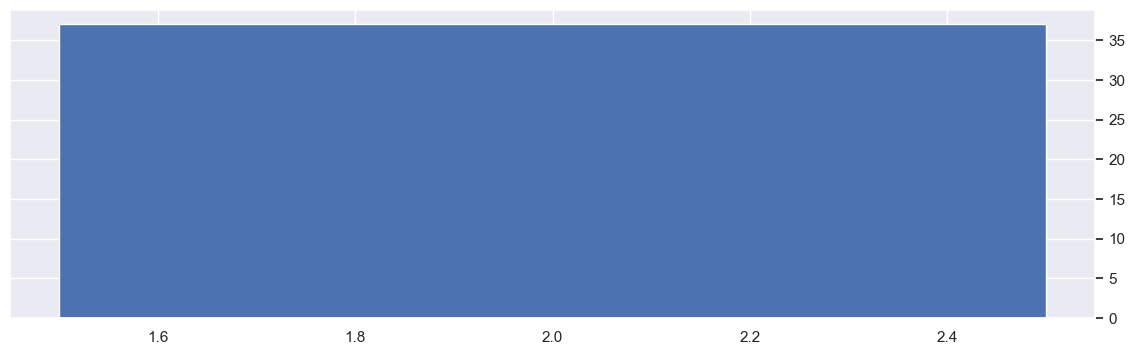


------------------------------------------------
Time Series:DISTRICT_ID
NUMERICAL


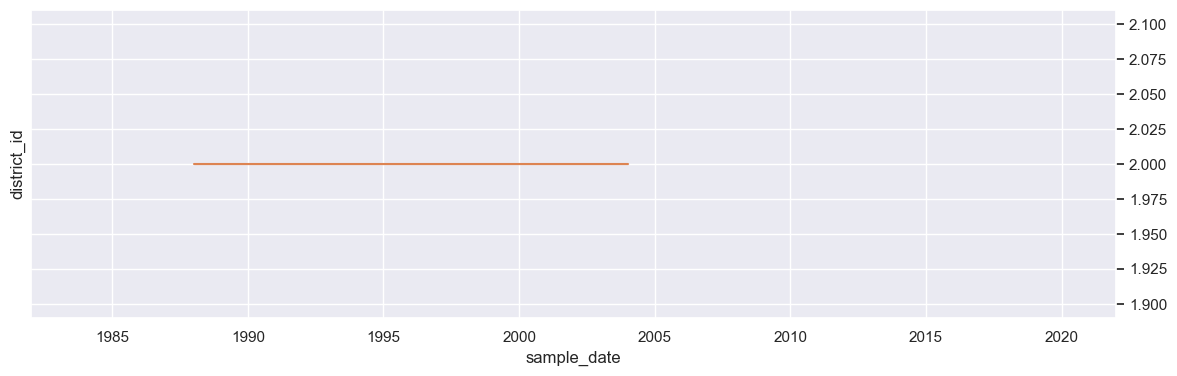

RIVER

--------------------------------------------------
Data Info: RIVER 

UNIQUE numbers, strings, blanks, null = (0, 1, 0, 0)
number of numeric = 0
number of strings = 37
number of blanks = 0
number of null =  0
check:  37 == 37

--------------------------------------------------
Histogram: RIVER


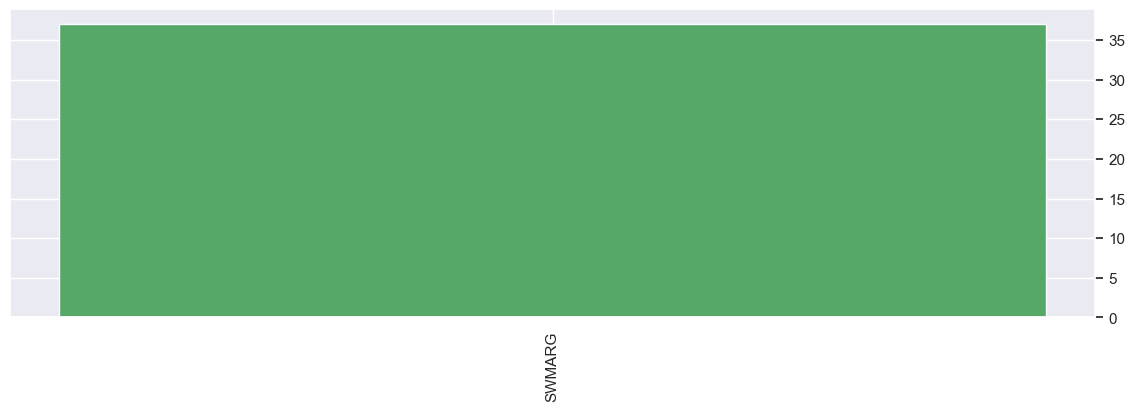


------------------------------------------------
Time Series:RIVER
CATEGORICAL


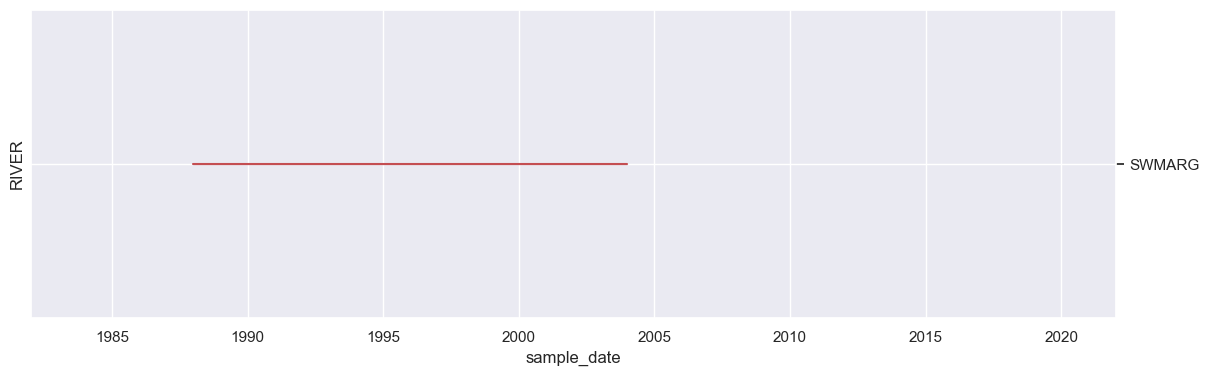

SAMPLER

--------------------------------------------------
Data Info: SAMPLER 

UNIQUE numbers, strings, blanks, null = (0, 14, 0, 0)
number of numeric = 0
number of strings = 37
number of blanks = 0
number of null =  0
check:  37 == 37

--------------------------------------------------
Histogram: SAMPLER


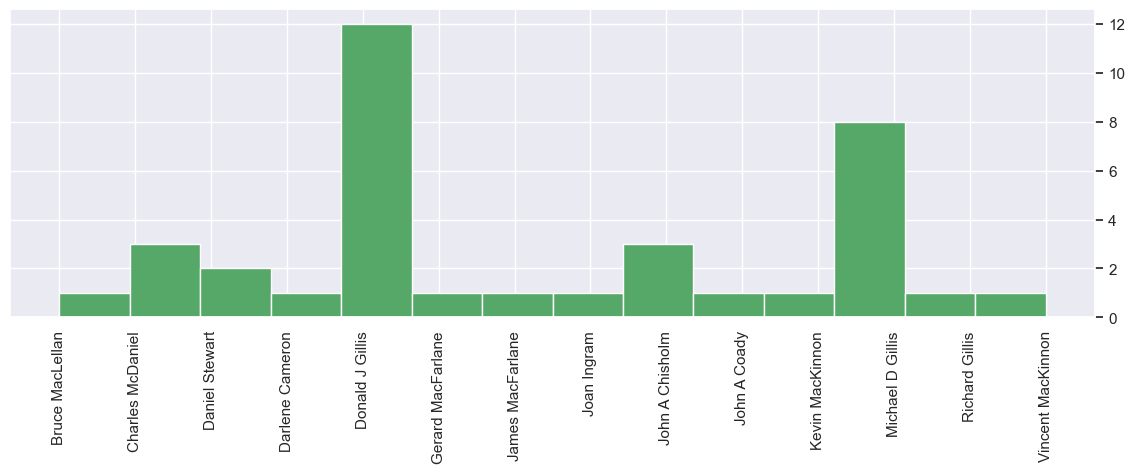


------------------------------------------------
Time Series:SAMPLER
CATEGORICAL


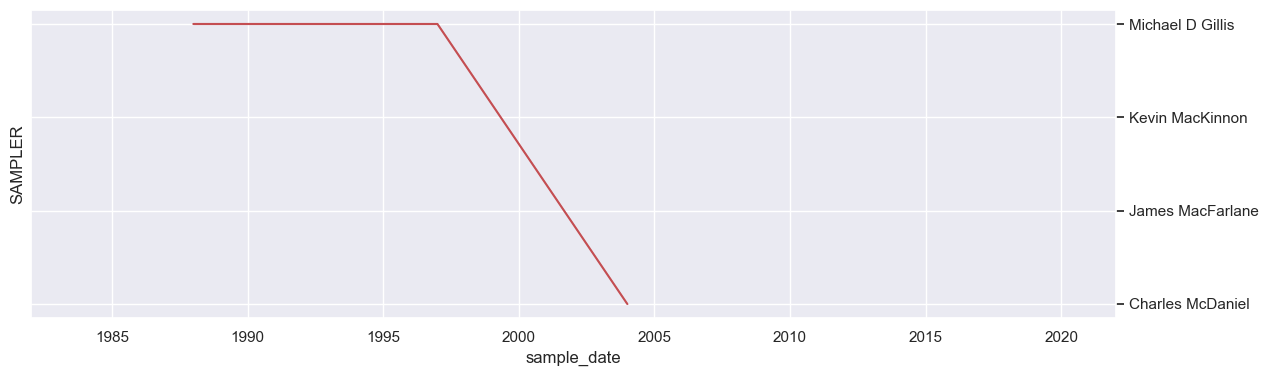

gear_id

--------------------------------------------------
Data Info: GEAR_ID 

UNIQUE numbers, strings, blanks, null = (1, 0, 0, 0)
number of numeric = 37
number of strings = 0
number of blanks = 0
number of null =  0
check:  37 == 37

--------------------------------------------------
Histogram: GEAR_ID


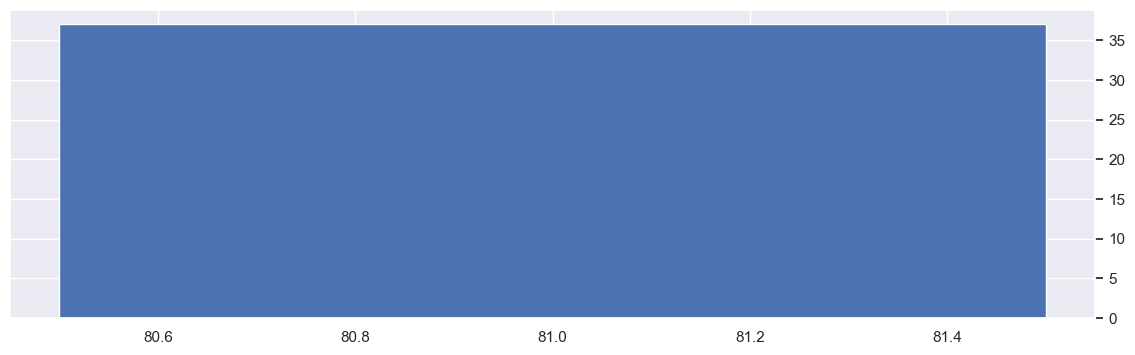


------------------------------------------------
Time Series:GEAR_ID
NUMERICAL


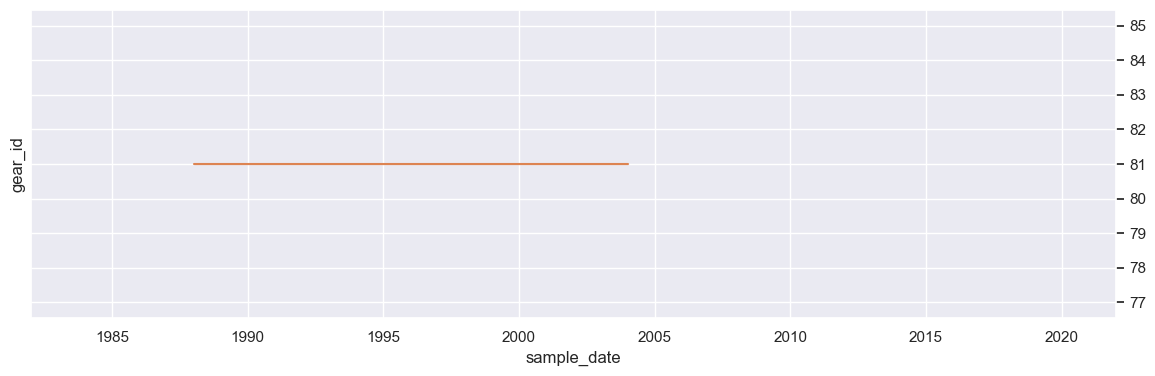

SITE

--------------------------------------------------
Data Info: SITE 

UNIQUE numbers, strings, blanks, null = (16, 0, 0, 0)
number of numeric = 37
number of strings = 0
number of blanks = 0
number of null =  0
check:  37 == 37

--------------------------------------------------
Histogram: SITE


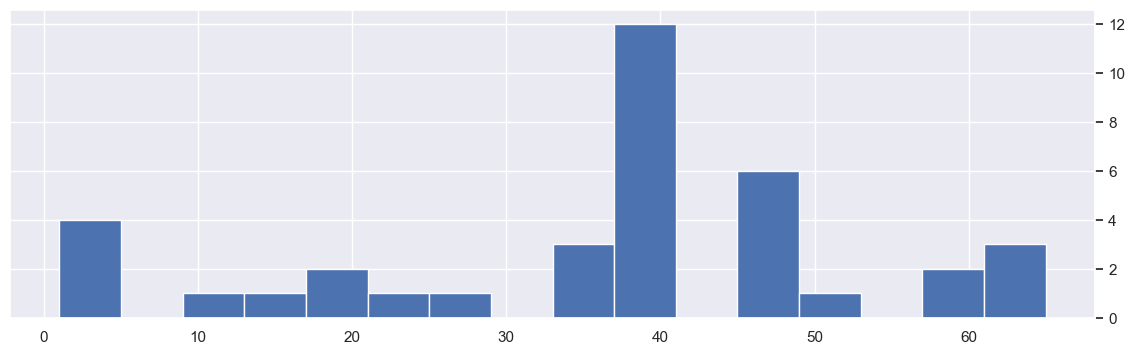


------------------------------------------------
Time Series:SITE
NUMERICAL


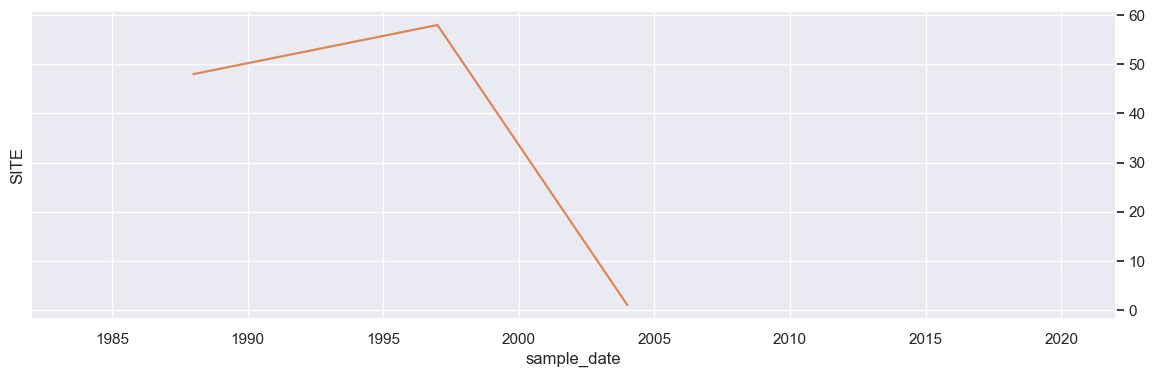

NO_NETS

--------------------------------------------------
Data Info: NO_NETS 

UNIQUE numbers, strings, blanks, null = (1, 0, 0, 1)
number of numeric = 22
number of strings = 0
number of blanks = 0
number of null =  15
check:  37 == 37

--------------------------------------------------
Histogram: NO_NETS


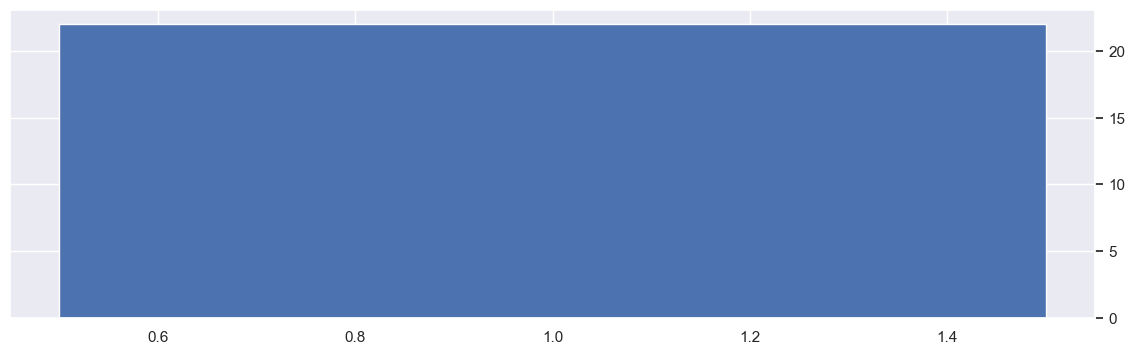


------------------------------------------------
Time Series:NO_NETS
NUMERICAL


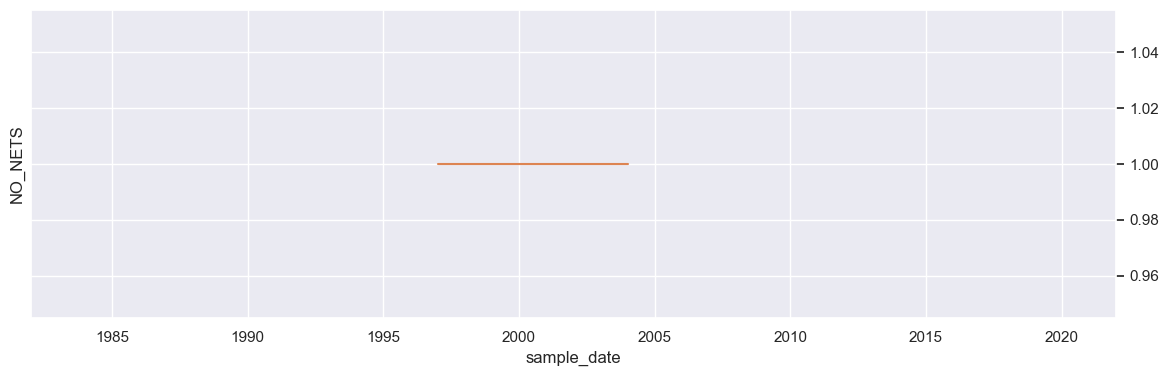

catch_weight_lbs

--------------------------------------------------
Data Info: CATCH_WEIGHT_LBS 

UNIQUE numbers, strings, blanks, null = (14, 0, 0, 1)
number of numeric = 35
number of strings = 0
number of blanks = 0
number of null =  2
check:  37 == 37

--------------------------------------------------
Histogram: CATCH_WEIGHT_LBS


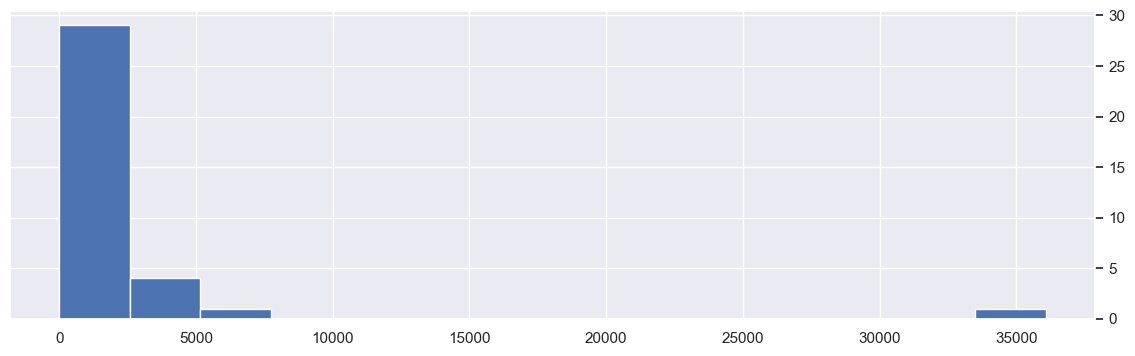


------------------------------------------------
Time Series:CATCH_WEIGHT_LBS
NUMERICAL


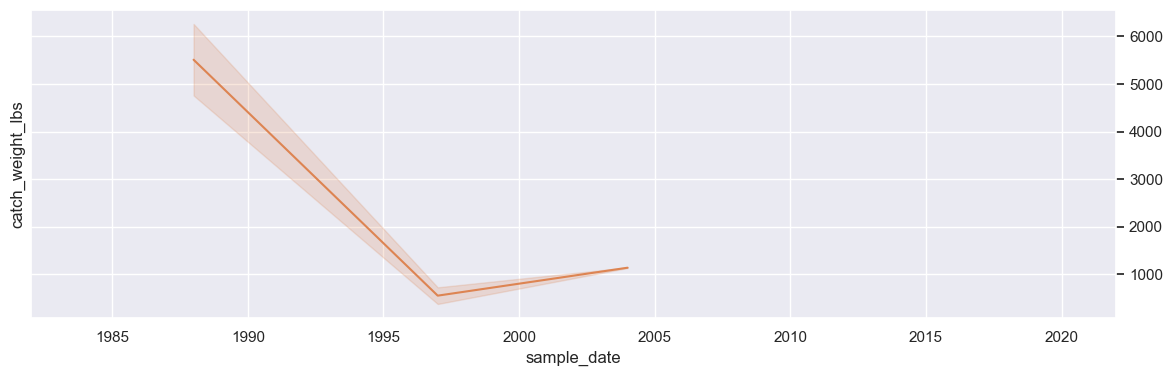

HOURS_FISHED

--------------------------------------------------
Data Info: HOURS_FISHED 

UNIQUE numbers, strings, blanks, null = (6, 0, 0, 1)
number of numeric = 17
number of strings = 0
number of blanks = 0
number of null =  20
check:  37 == 37

--------------------------------------------------
Histogram: HOURS_FISHED


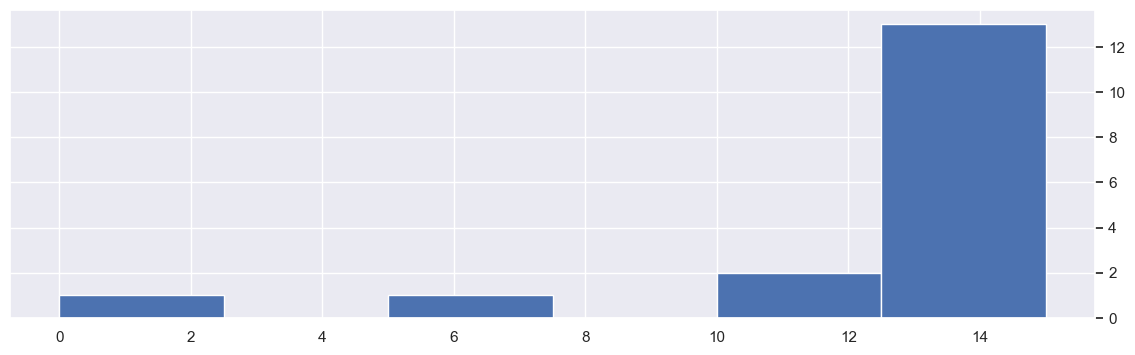


------------------------------------------------
Time Series:HOURS_FISHED
NUMERICAL


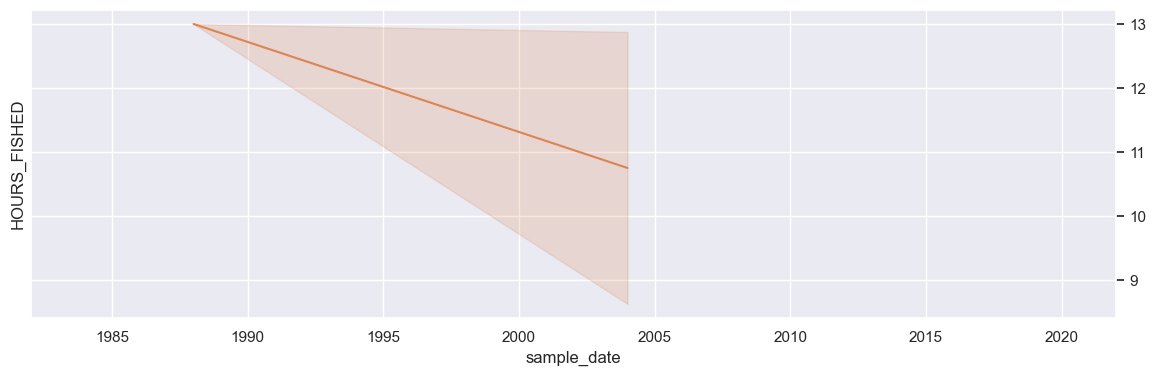

ZONE

--------------------------------------------------
Data Info: ZONE 

UNIQUE numbers, strings, blanks, null = (0, 2, 0, 1)
number of numeric = 0
number of strings = 34
number of blanks = 0
number of null =  3
check:  37 == 37

--------------------------------------------------
Histogram: ZONE


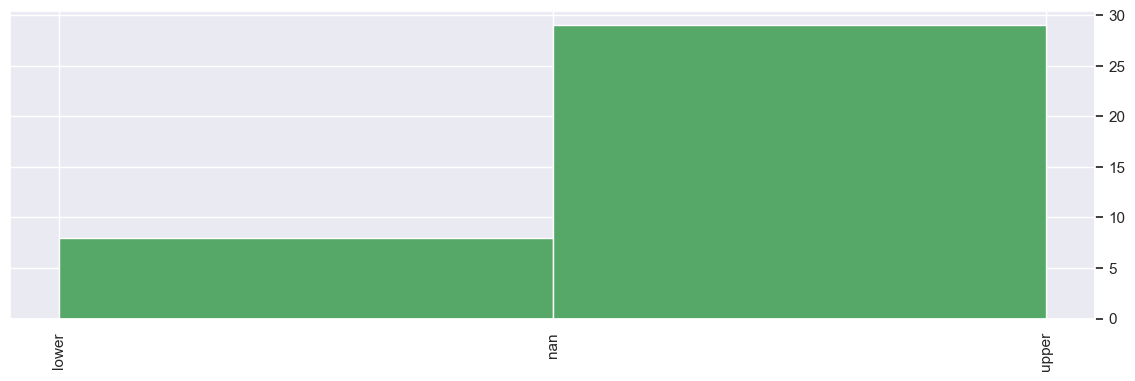


------------------------------------------------
Time Series:ZONE
CATEGORICAL


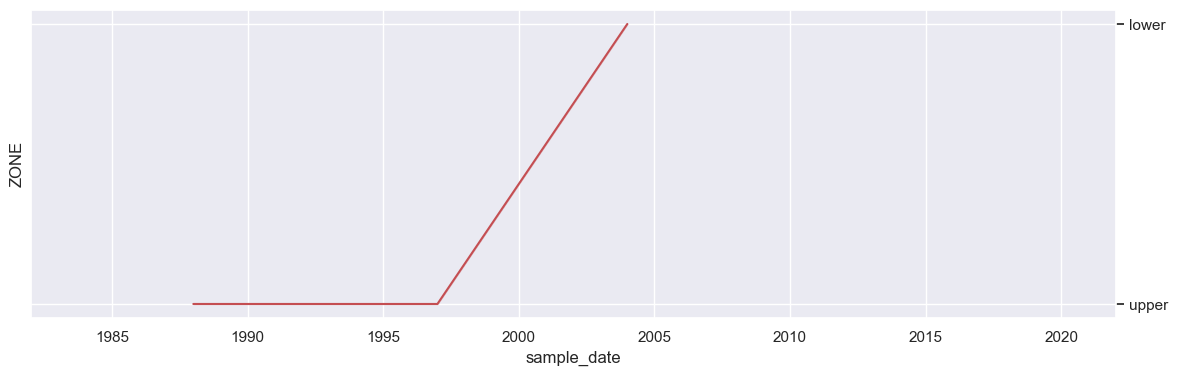

LAST_NAME

--------------------------------------------------
Data Info: LAST_NAME 

UNIQUE numbers, strings, blanks, null = (0, 7, 0, 1)
number of numeric = 0
number of strings = 31
number of blanks = 0
number of null =  6
check:  37 == 37

--------------------------------------------------
Histogram: LAST_NAME


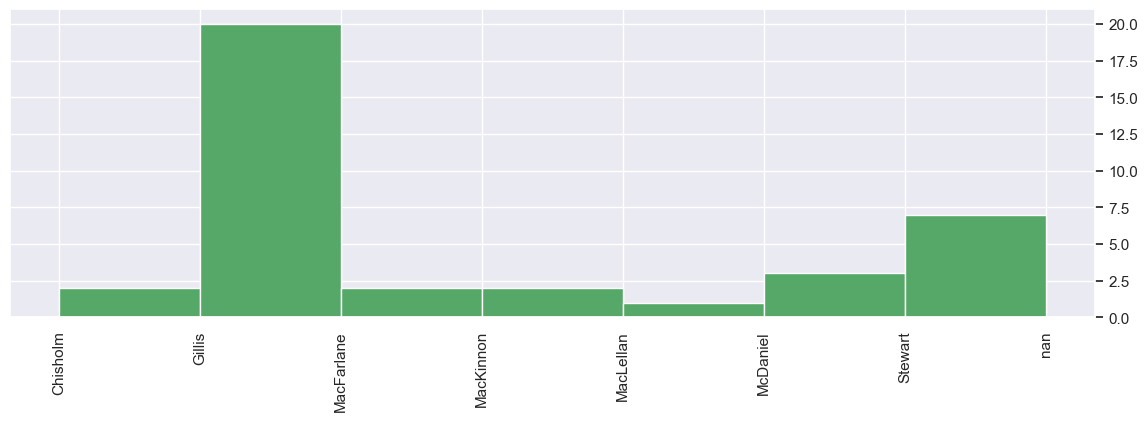


------------------------------------------------
Time Series:LAST_NAME
CATEGORICAL


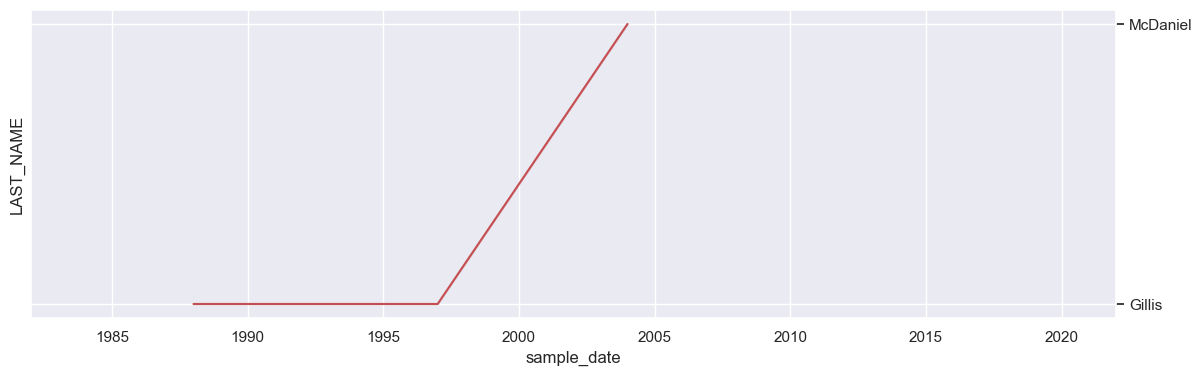


--------------------------------------------------
Data Info: BYCATCH_SBASS 

UNIQUE numbers, strings, blanks, null = (0, 0, 0, 1)
number of numeric = 0
number of strings = 0
number of blanks = 0
number of null =  37
check:  37 == 37

--------------------------------------------------
Data Info: BYCATCH_SHAD 

UNIQUE numbers, strings, blanks, null = (0, 0, 0, 1)
number of numeric = 0
number of strings = 0
number of blanks = 0
number of null =  37
check:  37 == 37

--------------------------------------------------
Data Info: BYCATCH_OTHER 

UNIQUE numbers, strings, blanks, null = (0, 0, 0, 1)
number of numeric = 0
number of strings = 0
number of blanks = 0
number of null =  37
check:  37 == 37

--------------------------------------------------
Data Info: TOTAL_FISH_PRESERVED 

UNIQUE numbers, strings, blanks, null = (0, 0, 0, 1)
number of numeric = 0
number of strings = 0
number of blanks = 0
number of null =  37
check:  37 == 37

--------------------------------------------------
Da

In [16]:
dont_plot_these_columns = [
    'sample_id', 'sample_date', 'COMMENTS', 'remarks', 'CODE'
]
plot_errors = [
    'BYCATCH_SBASS', 'BYCATCH_SHAD', 'BYCATCH_OTHER', 'sample_weight_lbs', 'DESCRIPTION OF PROBLEM',
    'total_fish_preserved', 'total_fish_measured'
]

for col in [x for x in list(rSD.columns) if x not in dont_plot_these_columns]:
    if col not in plot_errors:
        print(col)
        do_EDA_stuff(rSD, col, date_column='sample_date')
    else:
        print_data_info(rSD, col)

### LENGTH FREQUENCY

linear colour map


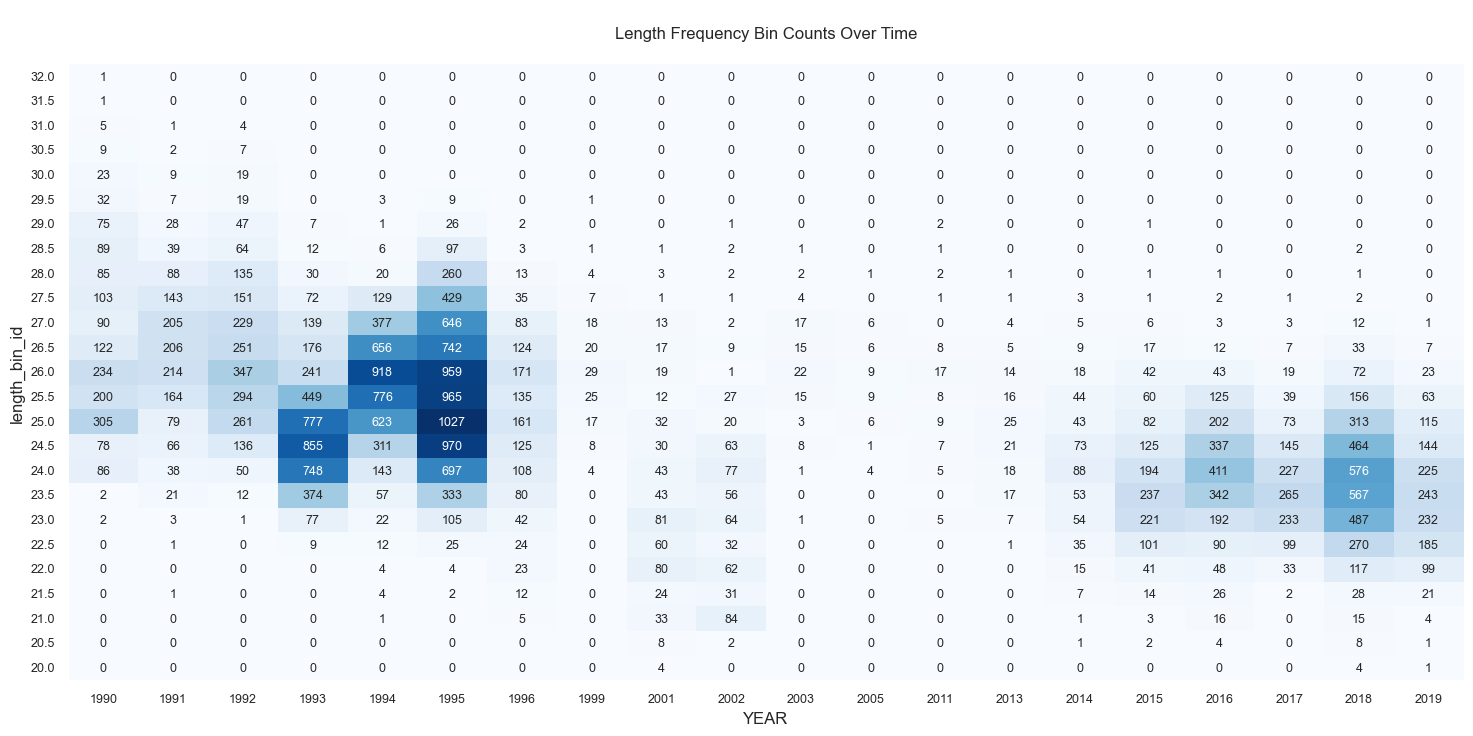

log normal colour map


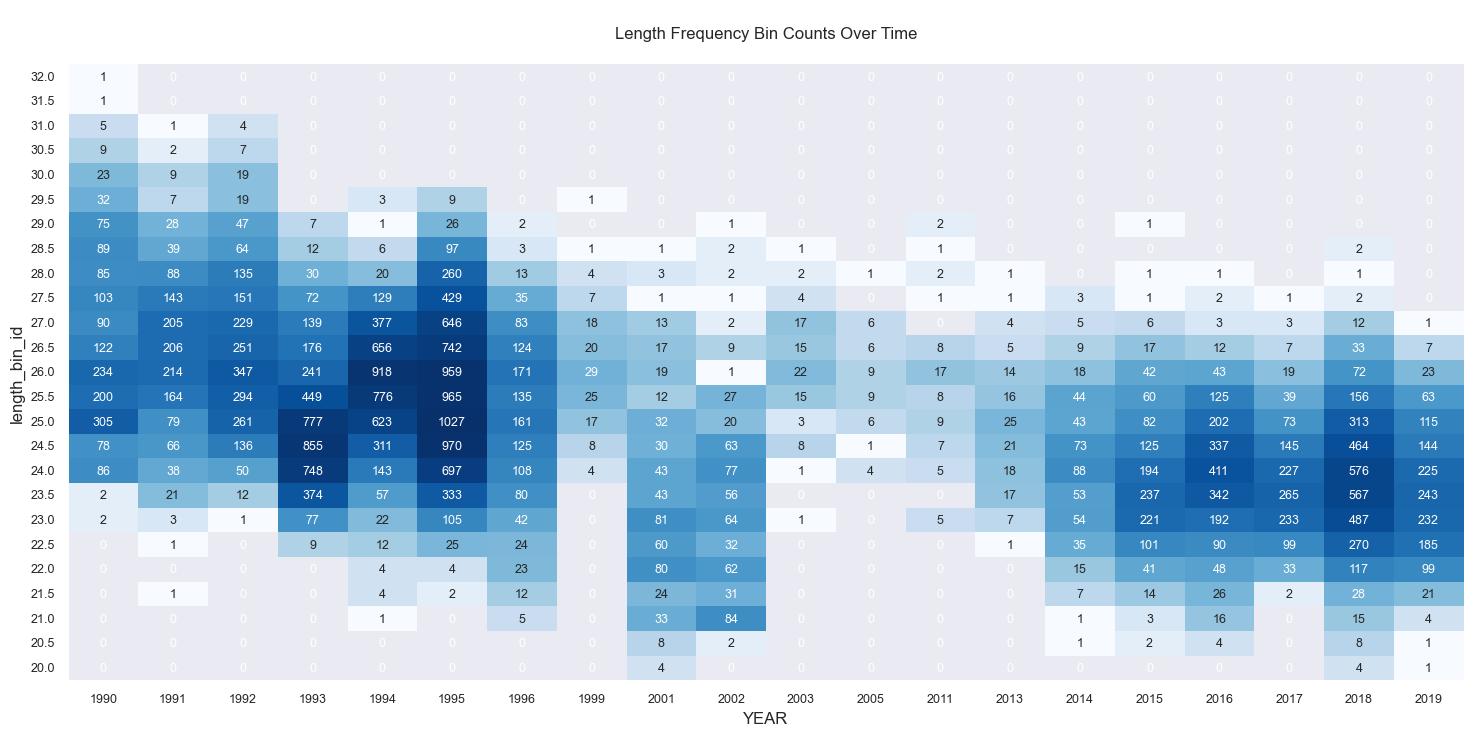

In [17]:
# HEATMAP for timeseries

TEMP = rLF.copy()
TEMP['YEAR'] = rLF.sample_id//1000000
TEMP = TEMP.drop('sample_id', axis=1)
TEMP = TEMP[TEMP.YEAR < 2023]

TEMP = TEMP.groupby(['YEAR', 'length_bin_id']).sum().reset_index(level=1)

def print_heatmap(**kwargs):
    fontsize=9

    # plot the grouped series
    plt.figure(figsize=(18, 8))

    plot = sns.heatmap(
        TEMP.reset_index().pivot('length_bin_id', 'YEAR', 'count').sort_values('length_bin_id', ascending=False).fillna(0),
        annot=True, 
        annot_kws={'size':fontsize},
        fmt='.0f',
        cbar=False,
        cmap='Blues',
        **kwargs
    )
    plt.title('\nLength Frequency Bin Counts Over Time\n')
    plot.tick_params(axis='both', which='major', labelsize=fontsize)

    plt.show()
    

# two different versions of the data viz (log normal and linear scale colour map)
print('=============================================')
print('linear colour map')
print_heatmap()
print('=============================================')
print('log normal colour map')
print_heatmap(norm=LogNorm())

----------------------------------------------
Histogram: 1993053010


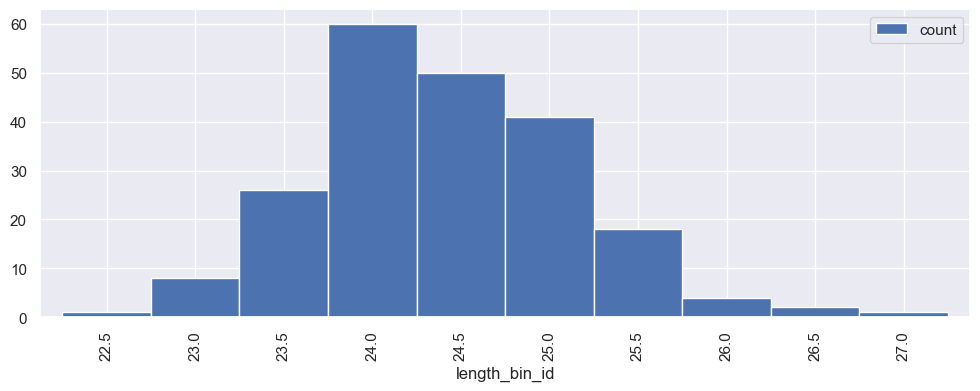

----------------------------------------------
Histogram: 3009052226


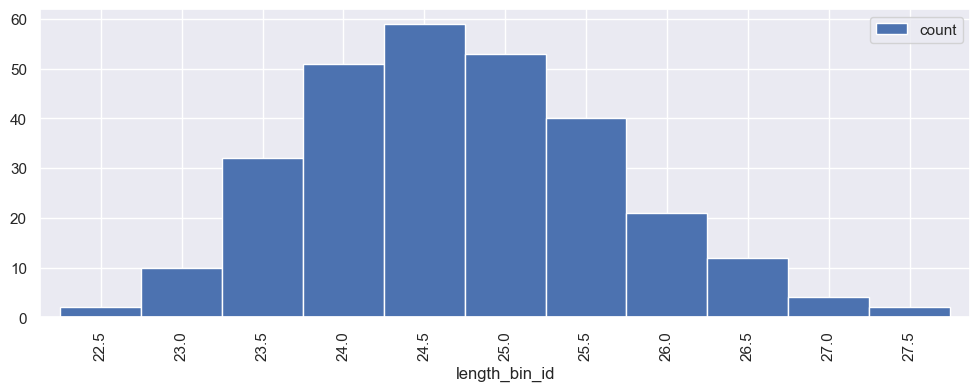

----------------------------------------------
Histogram: 3001051605


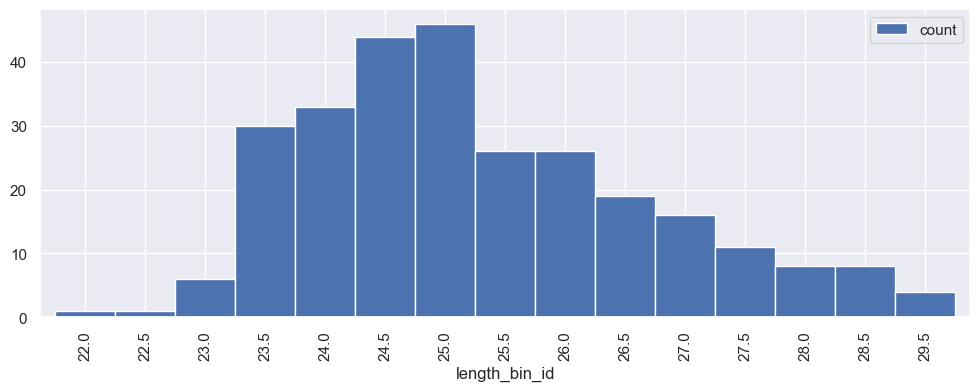

----------------------------------------------
Histogram: 2016051462


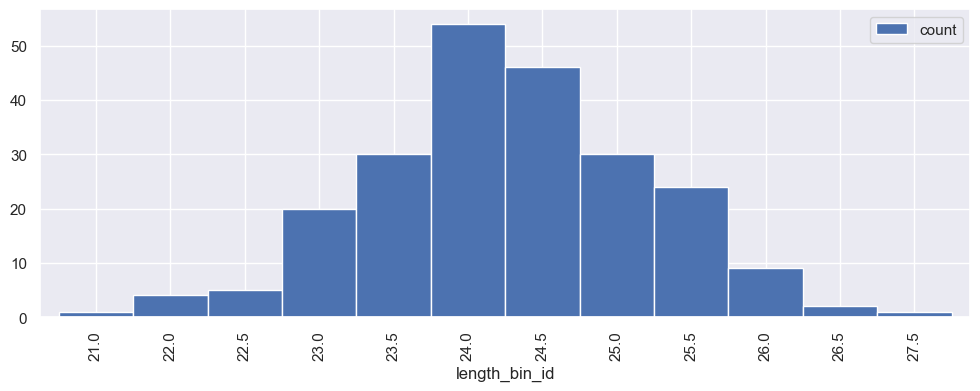

----------------------------------------------
Histogram: 4018061364


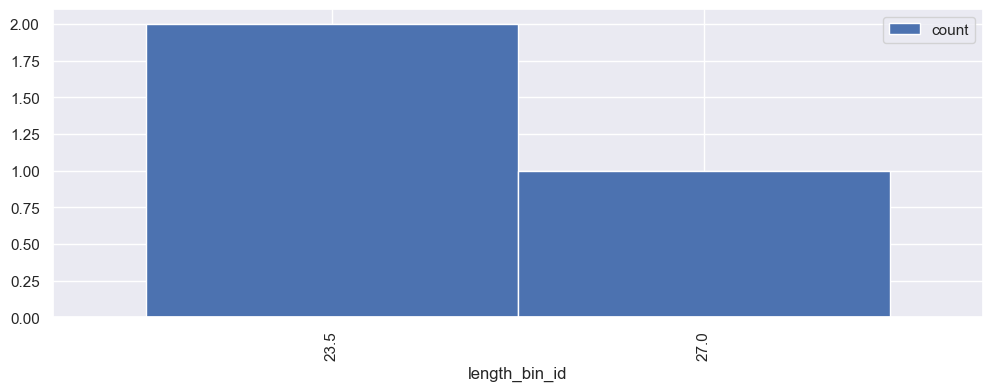

In [18]:
# check a few histograms from random samples
for i in range(5):
    sample_id = np.random.choice(rLF.sample_id.unique())
    print('----------------------------------------------\nHistogram:', sample_id)
    rLF.loc[rLF.sample_id==sample_id, ['count', 'length_bin_id']].plot(
        kind='bar', x='length_bin_id', y='count', width=1, figsize=(12,4)
    )
    plt.show()